# i. Perkenalan

Halo semuanya!

Saya Muhammad Farhan Salimuddin biasa dipanggil Farhan dari Hacktiv8 FTDS RMT 020
ingin memprediksi nasabah yang akan membayar pinjaman dan yang tidak membayar, dan juga menghitung berapa nilai yang hilang apabila nasabah tidak membayar,
menggunakan data yang berasaldari [Kaggle](https://www.kaggle.com/datasets/nurudeenabdulsalaam/prosper-loan-dataset), untuk penjelasan setiap kolomnya ada [disini](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). Dan untuk link deploymentnya ada [disini] (https://huggingface.co/spaces/burjoawl/H8-TalentFairV7-ProsperLoanDataset)

Semoga tahapan pengerjaan yang saya lakukan dapat dipahami oleh para pembaca, *happy coding*!

# ii. Memasukkan library
Library yang dimasukkan adalah yang akan digunakan dalam pengerjaan

In [1]:
# Untuk proses dataset
import pandas as pd
import numpy as np

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Untuk Pemodelan
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Untuk evaluasi model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

# Untuk bagian model saving
import pickle
import json

# iii. Data Loading

In [2]:
# Load dataset hasil download dan ekstrak
data_ori = pd.read_csv ('./prosperLoanData.csv')   # Memasukkan csv menjadi dataframe
data = data_ori.copy()                                    # Menduplikat data agar memiliki data asli dan data yang diproses
data                                                      # Menampilkan isi dataframe

ListingKey  ListingNumber ListingCreationDate  \
0       09E1336627538645259AE42            908             18:58.5   
1       A66F3364632427736031107           6328             35:35.9   
2       093D3365430569291709120           8912             23:10.1   
3       F77F33664545520971829DC           7646             59:15.2   
4       F737336598792393701AF04          11094             59:31.8   
...                         ...            ...                 ...   
113932  D01735804705532725E9C17         793414             23:25.5   
113933  75CB3586158361687FEB10C         864630             20:10.9   
113934  DAE435899343502411826FD         908411             56:19.5   
113935  175F3592204159489436B1F         964821             52:44.1   
113936  53AE359481412617687A5EF         999068             21:38.8   

       CreditGrade  Term LoanStatus       ClosedDate  BorrowerAPR  \
0               HR    36  Cancelled   3/29/2006 0:00      0.20735   
1                D    36  Defaulted   9/22/2006 0:00      0.23497   
2               HR    36  Cancelled   5/31/2006 0:00      0.25650   
3                C    36  Cancelled   5/31/2006 0:00      0.14659   
4                E    36  Defaulted  10/11/2006 0:00      0.24502   
...            ...   ...        ...              ...          ...   
113932         NaN    60  Completed   7/18/2013 0:00      0.20593   
113933         NaN    60  Completed   2/24/2014 0:00      0.13227   
113934         NaN    60  Completed   12/4/2013 0:00      0.14760   
113935         NaN    60  Completed   11/6/2013 0:00      0.16294   
113936         NaN    36  Completed    1/3/2014 0:00      0.12274   

        BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0             0.2000       0.1950  ...            0.00               0.00   
1             0.2275       0.2225  ...            0.00             -80.77   
2             0.2375       0.2325  ...            0.00               0.00   
3             0.1395       0.1345  ...            0.00               0.00   
4             0.2375       0.2200  ...            0.00              -3.06   
...              ...          ...  ...             ...                ...   
113932        0.1819       0.1719  ...          -22.28               0.00   
113933        0.1099       0.0999  ...         -173.50               0.00   
113934        0.1249       0.1149  ...          -71.23               0.00   
113935        0.1399       0.1299  ...          -26.85               0.00   
113936        0.0949       0.0849  ...          -46.55               0.00   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                         0.0                 0.00   
1                     10000.0              9004.98   
2                         0.0                 0.00   
3                         0.0                 0.00   
4                      3001.0              3001.00   
...                       ...                  ...   
113932                    0.0                 0.00   
113933                    0.0                 0.00   
113934                    0.0                 0.00   
113935                    0.0                 0.00   
113936                    0.0                 0.00   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                                 0.00            1.0                0   
1                              2755.12            1.0                0   
2                                 0.00            1.0                0   
3                                 0.00            1.0                0   
4                               100.00            1.0                0   
...                                ...            ...              ...   
113932                            0.00            1.0                0   
113933                            0.00            1.0                0   
113934                            0.00            1.0                0   
113935                            0.0

## Memperlihatkan tipe kolom

Terlihat tipe kolom yang ada dan melihat jumlah data yang ada, terdapat juga data yang kosong (null)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Memperlihatkan statistik data
Data yang terlihat adalah yang berjenis numerical(integer/float)

In [4]:
data.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

## Melihat jumlah dataset dan kolom

In [5]:
print (f'Dataset berjumlah {data.shape[0]} baris dan {data.shape[1]} kolom')

Dataset berjumlah 113937 baris dan 81 kolom


## Mengubah angka pada data kategori
Angka yang memiliki arti dirubah menjadi arti asli

Pada kolom ProsperRating
Pada dataset terdapat ProsperRating (numeric) dan ProsperRating (alpha), kedua kolom ini memiliki makna yang sama, sehingga akan disatukan.
Pada kolom tersebut terdapat data null, tetapi berdasarkan penjelasan kolom terdapat nilai 0 dan N/A, sedangkan tidak terdapat pada dataframe, sehingga yang null akan diisi nilai 0

In [6]:
data['ProsperRating (Alpha)'] = data['ProsperRating (Alpha)'].fillna('N/A')     # Mengisi data yang null dengan 0

data = data.drop(columns=['ProsperRating (numeric)'])                           # Membuang kolom yang memiliki makna yang sama

data.rename(columns={'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)   # Merubah nama kolom

Pada kolom 'ListingCategory (numeric)'

In [7]:
label_pada_ListingCategory = {
0 : 'Not Available',
1 : 'Debt Consolidation',
2 : 'Home Improvement',
3 : 'Business',
4 :' Personal Loan',
5 : 'Student Use',
6 : 'Auto',
7 : 'Other',
8 : 'Baby&Adoption',
9 : 'Boat',
10 : 'Cosmetic Procedure',
11 : 'Engagement Ring',
12 : 'Green Loans',
13 : 'Household Expenses',
14 : 'Large Purchases',
15 : 'Medical/Dental',
16 : 'Motorcycle',
17 : 'RV',
18 : 'Taxes',
19 : 'Vacation',
20 : 'Wedding Loans'
}

def label_ListringCategory(data):
    if data['ListingCategory (numeric)'] in label_pada_ListingCategory.keys():
        label = label_pada_ListingCategory[data['ListingCategory (numeric)']]
        return label
    else:
        return data['ListingCategory (numeric)']

data['ListingCategory (numeric)'] = data.apply(label_ListringCategory, axis=1)

data.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)   # Merubah nama kolom

## Mengecek setelah perubahan jenis data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Mengecek duplikat
Melihat adanya duplikat pada kolom yang seharusnya unique seperti kolom
'ListingKey',
'ListingNumber',
'LoanKey', dan
'LoanNumber'

Kolom 'ListingKey'

In [9]:
Listing_Key = data['ListingKey']
data[Listing_Key.isin(Listing_Key[Listing_Key.duplicated()])].sort_values("ListingKey")

ListingKey  ListingNumber ListingCreationDate CreditGrade  \
20229  00223594917038064A7C947         998257             58:37.2         NaN   
20228  00223594917038064A7C947         998257             58:37.2         NaN   
51531  00473590513960687DD308F         941296             47:36.0         NaN   
51530  00473590513960687DD308F         941296             47:36.0         NaN   
5546   0098360461900952056DB93        1190614             21:39.6         NaN   
...                        ...            ...                 ...         ...   
15668  FEF9358974260956441C450         906461             32:50.0         NaN   
16131  FF1B3590569175597E6830C         935199             14:30.2         NaN   
16132  FF1B3590569175597E6830C         935199             14:30.2         NaN   
3083   FFE13600149501913291BF7        1122473             59:42.0         NaN   
3082   FFE13600149501913291BF7        1122473             59:42.0         NaN   

       Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
20229    36    Current        NaN      0.23540        0.1980       0.1880   
20228    36    Current        NaN      0.23540        0.1980       0.1880   
51531    60    Current        NaN      0.22242        0.1980       0.1880   
51530    60    Current        NaN      0.22242        0.1980       0.1880   
5546     36    Current        NaN      0.29660        0.2574       0.2474   
...     ...        ...        ...          ...           ...          ...   
15668    36    Current        NaN      0.21699        0.1800       0.1700   
16131    36    Current        NaN      0.15833        0.1299       0.1199   
16132    36    Current        NaN      0.15833        0.1299       0.1199   
3083     36    Current        NaN      0.29455        0.2554       0.2454   
3082     36    Current        NaN      0.29455        0.2554       0.2454   

       ...  LP_ServiceFees  LP_CollectionFees  LP_GrossPrincipalLoss  \
20229  ...          -12.34                0.0                    0.0   
20228  ...          -12.34                0.0                    0.0   
51531  ...          -73.12                0.0                    0.0   
51530  ...          -73.12                0.0                    0.0   
5546   ...            0.00                0.0                    0.0   
...    ...             ...                ...                    ...   
15668  ...           -8.64                0.0                    0.0   
16131  ...           -8.14                0.0                    0.0   
16132  ...           -8.14                0.0                    0.0   
3083   ...            0.00                0.0                    0.0   
3082   ...            0.00                0.0                    0.0   

      LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments PercentFunded  \
20229                 0.0                              0.0           1.0   
20228                 0.0                              0.0           1.0   
51531                 0.0                              0.0           1.0   
51530                 0.0                              0.0           1.0   
5546                  0.0                              0.0           1.0   
...                   ...                              ...           ...   
15668                 0.0                              0.0           1.0   
16131                 0.0                              0.0           1.0   
16132                 0.0                              0.0           1.0   
3083                  0.0                              0.0           1.0   
3082                  0.0                              0.0           1.0   

      Recommendations InvestmentFromFriendsCount InvestmentFromFriendsAmount  \
20229               0                          0                         0.0   
20228               0                          0                         0.0   
51531               0                          0                         0.0   
51530               0   

Jika dilihat diatas, terdapat duplikat pada kolom 'ListingKey', dan dilihat pada kolom lainnya memiliki nilai yang sama, sehingga harus dihilangkan nilai yang duplikat tersebut.

In [10]:
data.drop_duplicates(subset='ListingKey', inplace=True)
data.shape

(112726, 80)

Kolom 'ListingNumber'

In [11]:
Listing_Number = data['ListingNumber']
data[Listing_Number.isin(Listing_Number[Listing_Number.duplicated()])].sort_values("ListingNumber")

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating, ProsperScore, ListingCategory, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

[0 rows x 80 columns]

Kolom 'LoanKey'

In [12]:
Loan_Key = data['LoanKey']
data[Loan_Key.isin(Loan_Key[Loan_Key.duplicated()])].sort_values("LoanKey")

ListingKey  ListingNumber ListingCreationDate CreditGrade  \
85526  C2B83541657922388984D20         570337             07:01.7         NaN   
19127  958E3576773804594DFCBFD         762432             48:01.7         NaN   
20232  A09033770540128929DAC42          80565             36:08.6          HR   
99269  B850340262026695977DE97         212579             50:25.4           A   
48430  DDF23564982122120E1C19A         680964             27:38.3         NaN   
...                        ...            ...                 ...         ...   
32292  F2DD3577466761899FBAD13         772753             23:22.0         NaN   
77456  98CA3402330698831BA236D         217444             25:33.2           B   
68664  8A7F35605998946829C5D74         660850             26:17.7         NaN   
91090  AF223367140783964C34925          34206             15:11.4           A   
67239  4C0A3557361454918091861         639225             16:54.0         NaN   

       Term  LoanStatus       ClosedDate  BorrowerAPR  BorrowerRate  \
85526    36   Completed   7/15/2013 0:00      0.17359        0.1449   
19127    60     Current              NaN      0.26877        0.2432   
20232    36  Chargedoff   2/16/2008 0:00      0.25757        0.2500   
99269    36   Completed    7/9/2009 0:00      0.11696        0.1100   
48430    36     Current              NaN      0.34045        0.3006   
...     ...         ...              ...          ...           ...   
32292    36     Current              NaN      0.32538        0.2859   
77456    36   Completed  10/25/2010 0:00      0.14709        0.1400   
68664    60     Current              NaN      0.24764        0.2226   
91090    36   Completed    9/6/2009 0:00      0.11586        0.1089   
67239    36     Current              NaN      0.09736        0.0839   

       LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
85526       0.1349  ...          -43.46               0.00   
19127       0.2332  ...          -25.51               0.00   
20232       0.2450  ...           -5.93             -21.29   
99269       0.1050  ...          -44.75               0.00   
48430       0.2906  ...          -40.67               0.00   
...            ...  ...             ...                ...   
32292       0.2759  ...          -25.09               0.00   
77456       0.1300  ...          -49.47               0.00   
68664       0.2126  ...         -174.54               0.00   
91090       0.1039  ...          -40.57               0.00   
67239       0.0739  ...          -56.49               0.00   

       LP_GrossPrincipalLoss LP_NetPrincipalLoss  \
85526                   0.00                0.00   
19127                   0.00                0.00   
20232                2238.18             2238.19   
99269                   0.00                0.00   
48430                   0.00                0.00   
...                      ...                 ...   
32292                   0.00                0.00   
77456                   0.00                0.00   
68664                   0.00                0.00   
91090                   0.00                0.00   
67239                   0.00                0.00   

       LP_NonPrincipalRecoverypayments PercentFunded Recommendations  \
85526                              0.0           1.0               0   
19127                              0.0           1.0               0   
20232                              0.0           1.0               0   
99269                              0.0           1.0               0   
48430                              0.0           1.0               0   
...                                ...           ...             ...   
32292                              0.0           1.0               0   
77456                              0.0           1.0               0   
68664                              0.0           1.0               0   
91090                              0.0           1.0               0   
67239                           

Kolom 'LoanNumber'

In [13]:
Loan_Number = data['LoanNumber']
data[Loan_Number.isin(Loan_Number[Loan_Number.duplicated()])].sort_values("LoanNumber")

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating, ProsperScore, ListingCategory, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

[0 rows x 80 columns]

Pada kolom
'ListingKey',
'ListingNumber',
'LoanKey', dan
'LoanNumber'
tidak memiliki data yang duplikat

# iv. EDA
Exploratory Data Analyst, melakukan eksplorasi data yang ada

## Melihat data berdasarkan status Loan

In [14]:
status_loan = sorted(data['LoanStatus'].unique())

def filter_status_loan(data, loan_status):
    filtered_data = data[data['LoanStatus'] == loan_status]
    return filtered_data

for loan_status in status_loan:
    filtered_data = filter_status_loan(data, loan_status)
    num_rows, num_columns = filtered_data.shape
    print(f"Data {loan_status} berjumlah {num_rows} data")

Data Cancelled berjumlah 5 data
Data Chargedoff berjumlah 11974 data
Data Completed berjumlah 37868 data
Data Current berjumlah 55620 data
Data Defaulted berjumlah 5008 data
Data FinalPaymentInProgress berjumlah 202 data
Data Past Due (1-15 days) berjumlah 794 data
Data Past Due (16-30 days) berjumlah 265 data
Data Past Due (31-60 days) berjumlah 361 data
Data Past Due (61-90 days) berjumlah 311 data
Data Past Due (91-120 days) berjumlah 302 data
Data Past Due (>120 days) berjumlah 16 data


Sebelumnya, apa arti dari status-status tersebut? Penjelasannya adalah:

* Charged Off: \
Ini adalah status ketika pemberi pinjaman menganggap pinjaman sebagai kerugian dan mencatatnya sebagai beban. Ini terjadi ketika peminjam gagal membayar pinjaman mereka dalam jangka waktu yang cukup lama. Meskipun pinjaman dianggap sebagai beban, pemberi pinjaman masih dapat melakukan upaya penagihan.

* Defaulted: \
Ini adalah kondisi ketika peminjam tidak memenuhi kewajibannya dalam membayar angsuran atau pinjaman sesuai dengan jadwal pembayaran yang disepakati. Default seringkali memicu tindakan penagihan dan pemberi pinjaman dapat mengambil langkah-langkah untuk memulihkan pinjaman yang belum dibayar.

* Completed: \
Status ini menunjukkan bahwa pinjaman telah dilunasi sepenuhnya sesuai dengan ketentuan kontrak. Semua angsuran atau pembayaran telah diselesaikan oleh peminjam dan tidak ada kewajiban pembayaran yang tersisa.

* Current: \
Ini adalah status yang menunjukkan bahwa peminjam masih dalam pembayaran yang berjalan dan tidak ada keterlambatan signifikan dalam pembayaran angsuran.

* Cancelled: \
Status ini menunjukkan bahwa pinjaman telah dibatalkan sebelum selesai. Alasan pembatalan dapat bervariasi, tetapi ini mengindikasikan bahwa peminjam atau pemberi pinjaman memutuskan untuk tidak melanjutkan pinjaman.

* Final Payment in Progress: \
Ini menunjukkan bahwa peminjam sedang dalam proses melakukan pembayaran akhir untuk melunasi pinjaman sepenuhnya.

* Past Due: \
Ini mengacu pada kondisi di mana peminjam telah melewati tanggal jatuh tempo pembayaran angsuran. Istilah "Past Due" biasanya diikuti oleh jumlah hari keterlambatan, seperti "Past Due (1-15 days)" atau "Past Due (31-60 days)", yang menunjukkan seberapa lama peminjam telah melewatkan pembayaran.

Untuk mendapatkan kriteria berupa score, kita lihat berdasarkan status loan, kita hanya akan menentukan apakah nasabah yang berkemungkinan membayar atau tidak untuk diberikan pinjaman.

Jika dilihat dari data yang ada, penulis ingin membagi nasabah yang berkemungkinan melunasi pinjaman dan tidak, untuk nasabah yang lunas yaitu berstatus "Completed", untuk nasabah yang tidak adalah yang berstatus "Charged Off", "Defaulted" karena dianggap tidak menepati perjanjian yang sudah dibuat. Untuk status "Current" dan "Past Due" belum dapat ditentukan karena masih berjalan, dan masih memiliki kemungkinan untuk membayar.

In [15]:
kolom = data.columns

bayar = data[data['LoanStatus'] == 'Completed'][kolom]
tidak_bayar = data[(data['LoanStatus'] == 'Chargedoff') | (data['LoanStatus'] == 'Defaulted')][kolom]

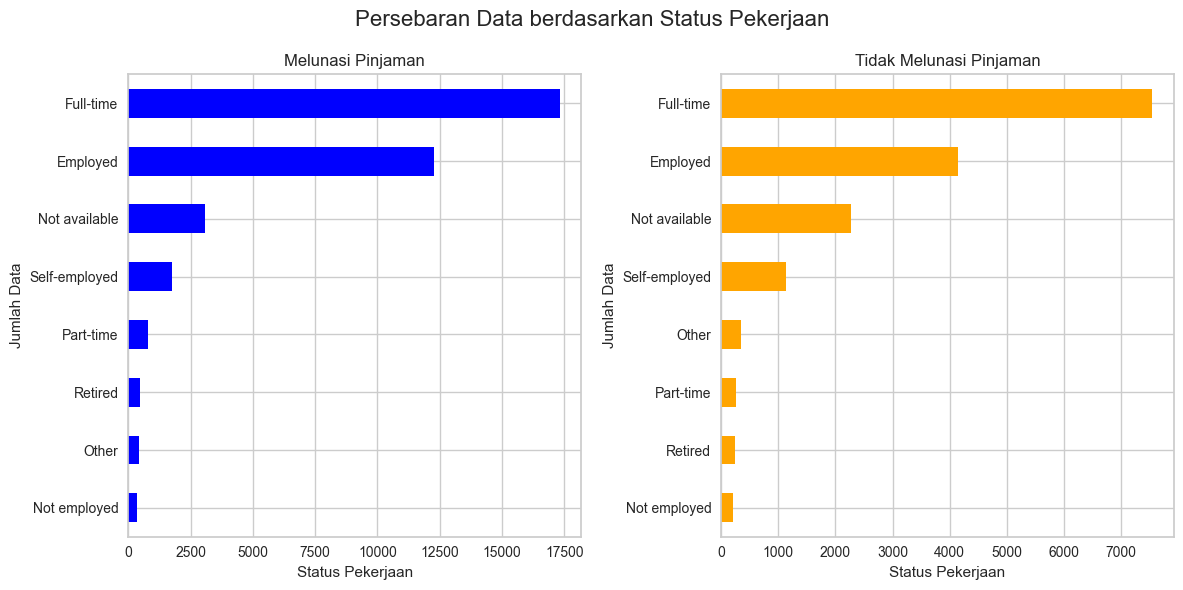

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Persebaran Data berdasarkan Status Pekerjaan', fontsize=16)

# Melunasi Pinjaman
bayar['EmploymentStatus'].value_counts().sort_values(ascending=True).plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Melunasi Pinjaman')
axes[0].set_xlabel('Status Pekerjaan')
axes[0].set_ylabel('Jumlah Data')

# Tidak Melunasi Pinjaman
tidak_bayar['EmploymentStatus'].value_counts().sort_values(ascending=True).plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_title('Tidak Melunasi Pinjaman')
axes[1].set_xlabel('Status Pekerjaan')
axes[1].set_ylabel('Jumlah Data')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, tidak adanya perbedaan antara yang akan melunasi pinjaman dengan yang tidak akan melunasi, sehingga tidak dapat membedakan dari segi status pekerjaan yang akan melunasi ataupun tidak

## Memisahkan dataset yang sudah ditentukan status pembayarannya dan belum

In [17]:
data_sudah_ditentukan = data[(data['LoanStatus'] == 'Completed') |
                             (data['LoanStatus'] == 'Chargedoff') |
                             (data['LoanStatus'] == 'Defaulted')]
data_belum_ditentukan = data

In [18]:
# Membuat kolom baru yang berisi binary antara bayar dan tidak
data_sudah_ditentukan['Pelunasan'] = data_sudah_ditentukan['LoanStatus'].apply(lambda x: '0' if x == 'Completed' else '1')

# Dihilangkan kolom yang sudah digunakan
data_sudah_ditentukan = data_sudah_ditentukan.drop(columns='LoanStatus')


C:\Users\farha\AppData\Local\Temp\ipykernel_34452\2074191590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sudah_ditentukan['Pelunasan'] = data_sudah_ditentukan['LoanStatus'].apply(lambda x: '0' if x == 'Completed' else '1')


## Melihat perbandingan pada 'Occupation'
Yang akan melunasi atau tidak

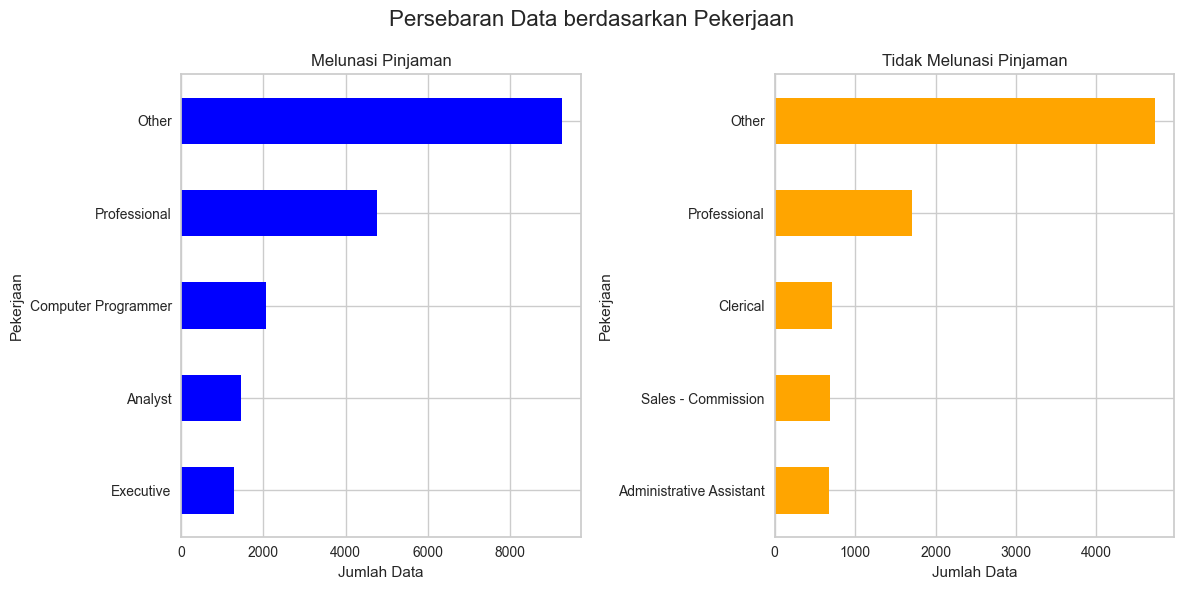

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Persebaran Data berdasarkan Pekerjaan', fontsize=16)

# Melunasi Pinjaman
bayar['Occupation'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Melunasi Pinjaman')
axes[0].set_ylabel('Pekerjaan')
axes[0].set_xlabel('Jumlah Data')

# Tidak Melunasi Pinjaman
tidak_bayar['Occupation'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_title('Tidak Melunasi Pinjaman')
axes[1].set_ylabel('Pekerjaan')
axes[1].set_xlabel('Jumlah Data')

plt.tight_layout()
plt.show()

Melihat grafik diatas, pada pekerjaan 'Other' dan 'Professional' memliki angka yang tinggi antara melunasi pinjaman dan tidak. 'Clerical', 'Sales - Commission', dan 'Administrative Assistant' memiliki angka yang cukup tinggi pada tidak melunasi pinjaman, sehingga jika ada nasabah yang ingin melakukan pengajuan yang memiliki pekerjaan tersebut akan ditinjau lebih lanjut agar tidak menjadi nasabah yang tidak melunasi pinjaman. Sedangkan pada yang melunasi pinjaman ada pada pekerjaan 'Computer Programmer', 'Analyst', dan 'Executive', sehingga nasabah yang memiliki pekerjaan tersebut tidak perlu khawatir untuk melunasi pinjaman.

## Mengecek korelasi antar kolom

<Axes: >

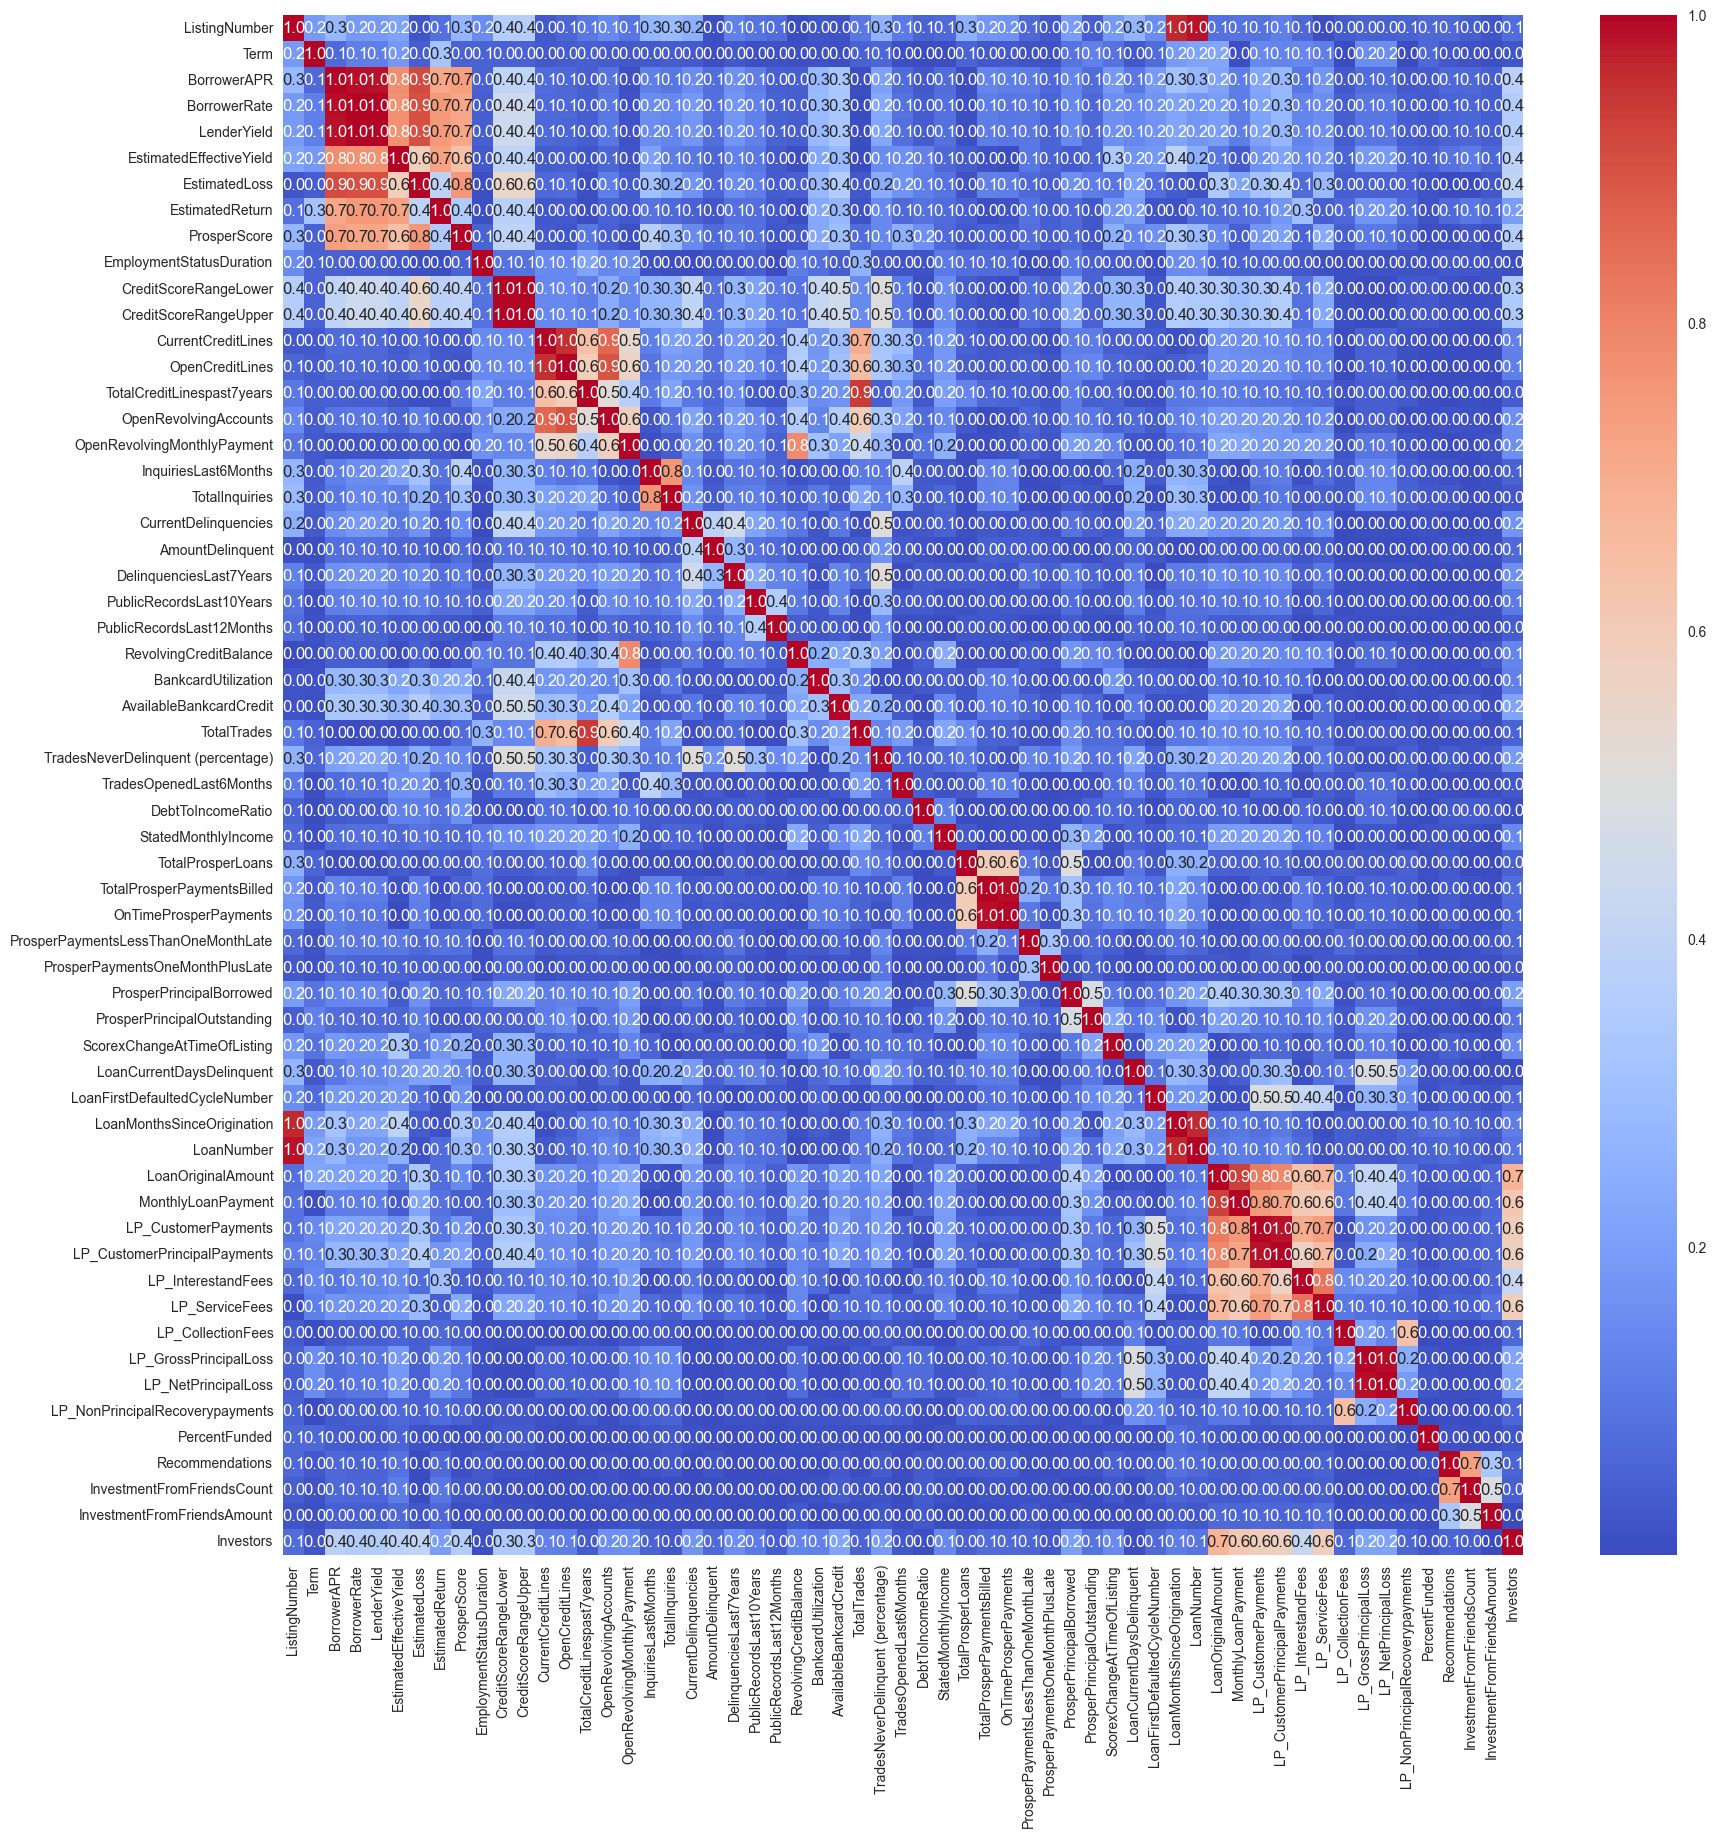

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_sudah_ditentukan.select_dtypes(include=np.number).corr().abs(), annot=True, fmt=".1f", cmap="coolwarm")

Menghilangkan kolom yang memiliki nilai korelasi yang tinggi, terlihat pada nilai korelasinya berupa angka lebih besar dari 0.7

In [21]:
kolom_drop = ['ListingKey','ListingNumber','LoanKey','LoanNumber', 'GroupKey', 'MemberKey', # Nilai yang unique dan tidak penting karena hanya berupa ID nasabah
              'BorrowerAPR', 'LenderYield', # Antara BorrowerAPR, BorrowerRate, dan LenderYield memiliki nilai korelasi sangaat tinggi, jadi digunakan 1 kolom saja, saya pilih BorrowerRate
              'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'CreditGrade', # Score predetermine dari sisi peminjam sehingga akan dihapus terlebih dahulu
              'OpenCreditLines', 'OpenRevolvingAccounts', # Memilih antara OpenCreditLines, CurrentCreditLines, atau OpenRevolingAccounts
              'OnTimeProsperPayments',      # Memilih antara OnTimeProsperPayments atau TotalTimeProsperPayments
              'LP_NetPrincipalLoss',        # Memilih antara LP_GrossPrincipalLoss atau LP_NetPrincipalLoss
              'LP_CustomerPayments',         # Memilih antara LP_CustomerPayments atau LP_CustomerPrincipalPayments
              'LP_InterestandFees','LP_CollectionFees','LP_ServiceFees', 'LP_NonPrincipalRecoverypayments', # Berfokus pada Principal Payments karena hanya ingin berfokus pada satu jenis pembayaran
              'ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', # Hanya data waktu, tidak perlu digunakan
              'EstimatedLoss', 'LoanOriginalAmount', 'TotalCreditLinespast7years', # Nilai korelasi tinggi
              'IncomeRange', # Memiliki arti bisnis yang sama dengan StatedMonthlyIncome
              'LoanCurrentDaysDelinquent','LP_GrossPrincipalLoss' # Didrop karena korelasi terhadap target terlalu kuat, sehingga dikhawatirkan akan menjadi fitur yang terlalu dominan
              ]

data_sudah_ditentukan = data_sudah_ditentukan.drop(kolom_drop, axis=1)
data_sudah_ditentukan.shape

(54850, 49)

<Axes: >

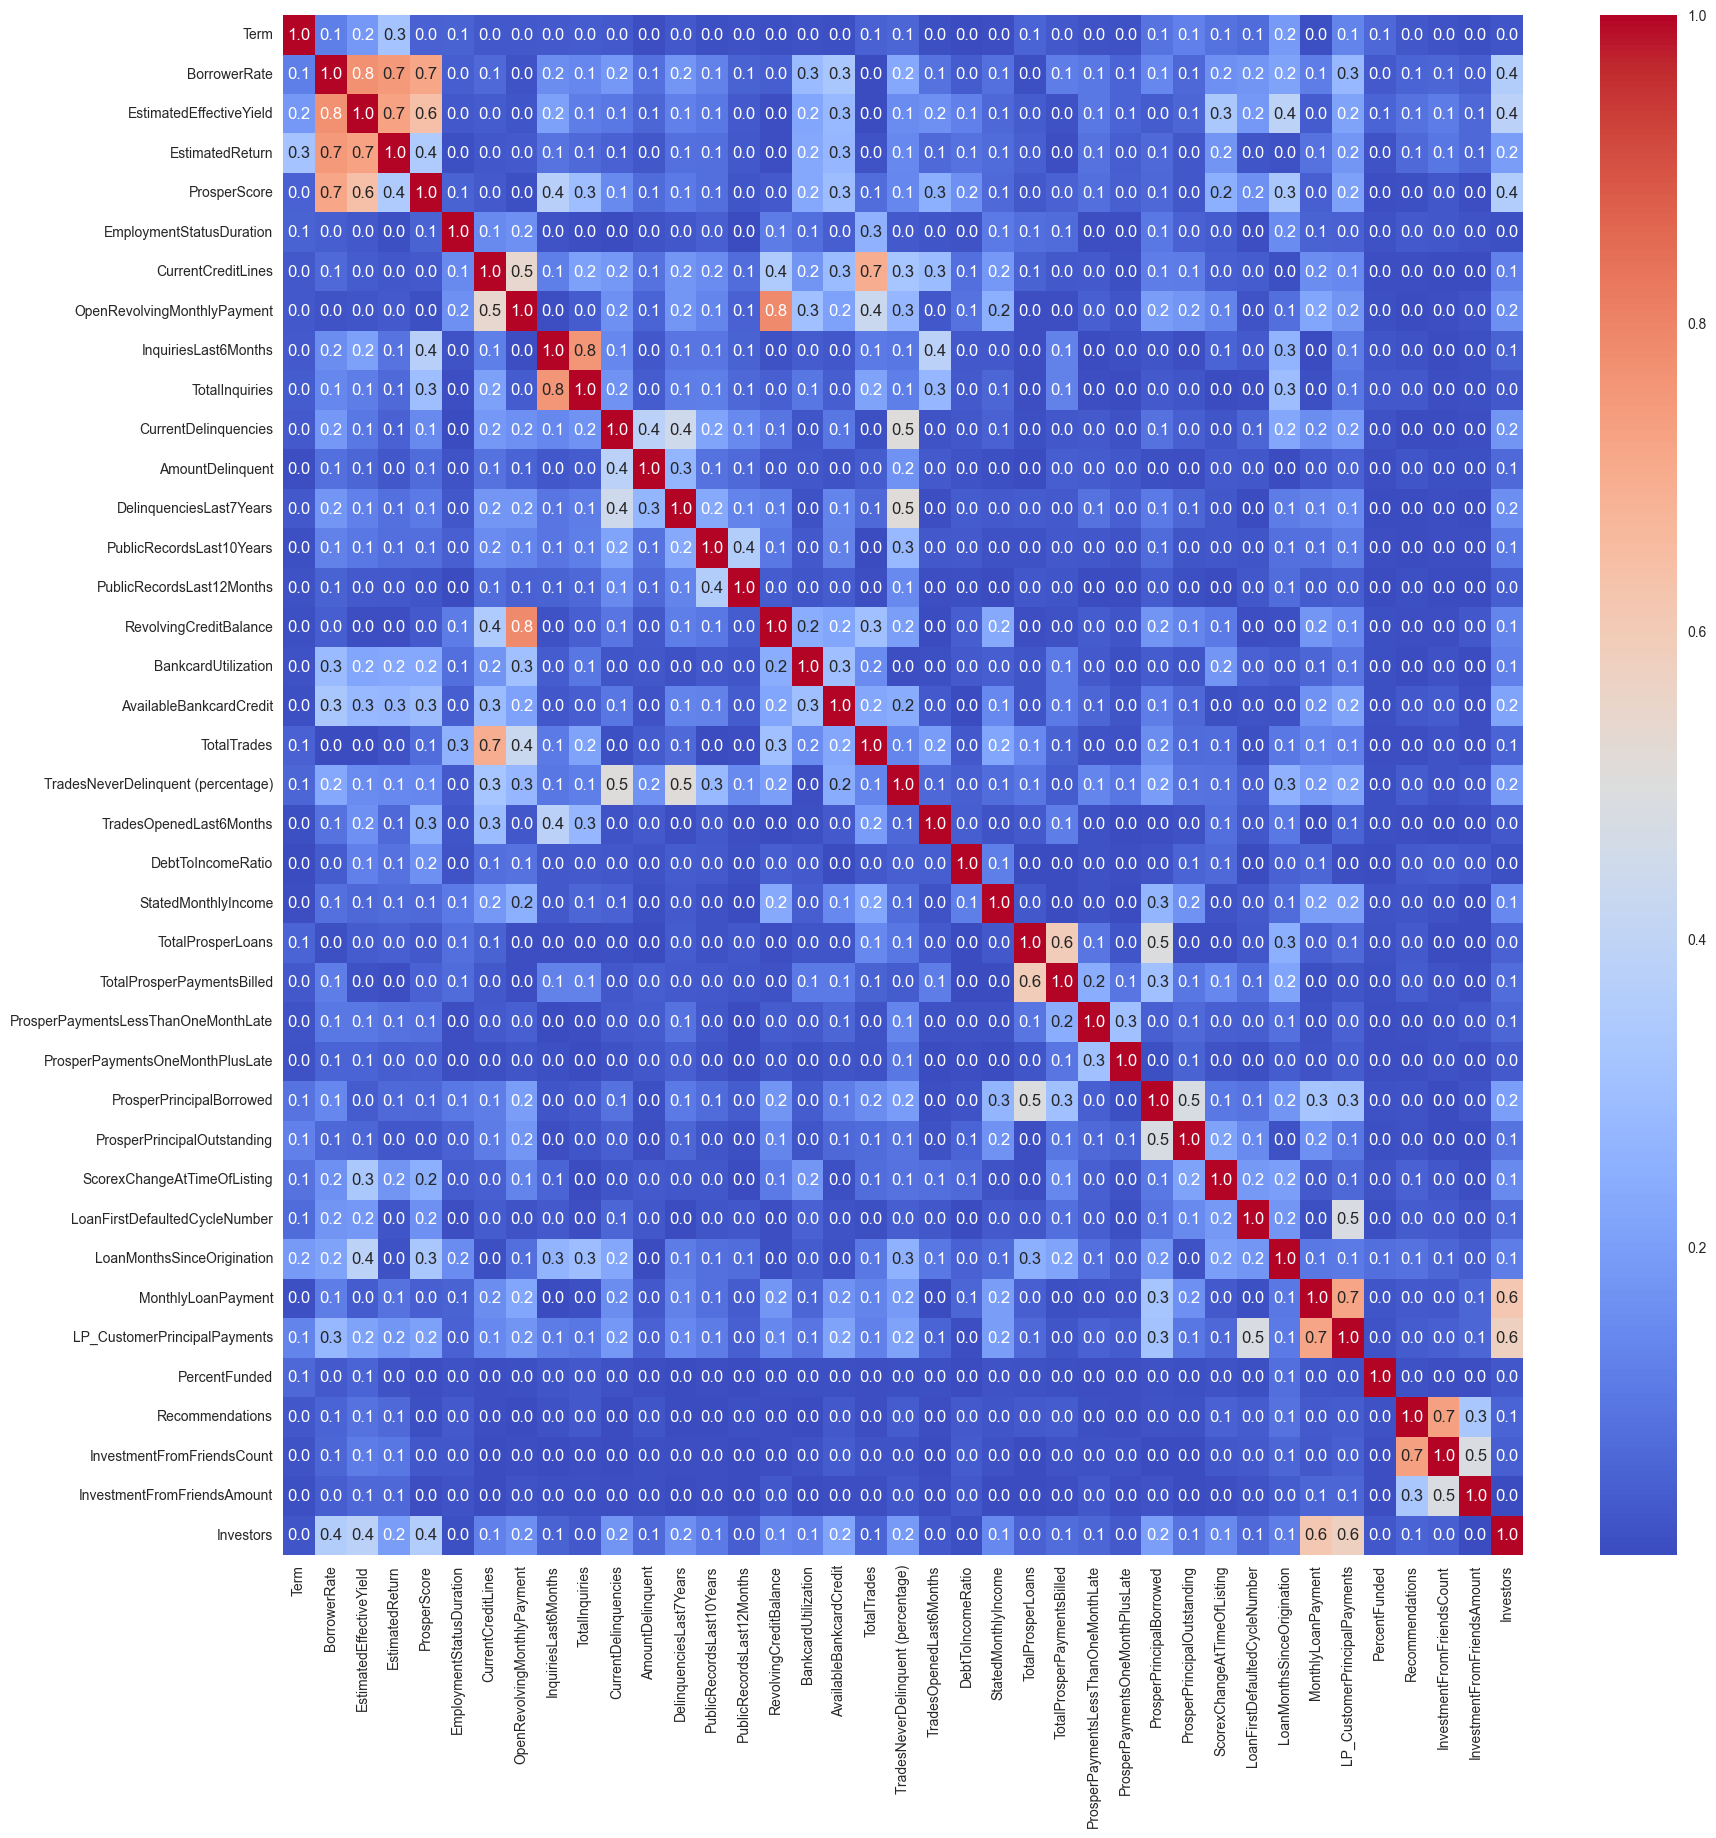

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_sudah_ditentukan.select_dtypes(include=np.number).corr().abs(), annot=True, fmt=".1f", cmap="coolwarm")

## Membuat kategori berdasarkan payment

In [23]:
def kategori_nasabah_payment(payment):
    if payment < 2000:
        return "< 2000"
    elif 2000 <= payment < 5000:
        return "2000 ~ 4999"
    else:
        return ">= 5000"

data_sudah_ditentukan['kategori_nasabah_payment'] = data_sudah_ditentukan['LP_CustomerPrincipalPayments'].apply(kategori_nasabah_payment)

data_sudah_ditentukan = data_sudah_ditentukan.drop(columns=['LP_CustomerPrincipalPayments'])


# v. Model Klasifikasi

Untuk menentukan tipe pelunasan nasabah

## Feature Engineering

### Split antara X (Feature) dan y (Target)

In [24]:
X = data_sudah_ditentukan.drop (['Pelunasan'], axis=1)
y = data_sudah_ditentukan['Pelunasan']

### Split Train-Set dan Test-Set

Train adalah data yang digunakan untuk dilakukan permodelan, sedangkan Test adalah data yang digunakan untuk uji coba dari permodelan yang dilakukan oleh data Train

In [25]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1509)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X Train Size (43880, 48)
X Test Size: (10970, 48)

y Train Size (43880,)
y Test Size: (10970,)


### Handle Missing Value

Melakukan analisa pada data yang hilang pada dataset

#### Pada data X_train

In [26]:
def missing_check(X_train):
    total = X_train.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_train.isnull().sum()/X_train.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_train)

Total    Percent
ScorexChangeAtTimeOfListing          35562  81.043756
ProsperPaymentsOneMonthPlusLate      35482  80.861440
TotalProsperLoans                    35482  80.861440
TotalProsperPaymentsBilled           35482  80.861440
ProsperPrincipalOutstanding          35482  80.861440
ProsperPaymentsLessThanOneMonthLate  35482  80.861440
ProsperPrincipalBorrowed             35482  80.861440
LoanFirstDefaultedCycleNumber        30314  69.083865
ProsperScore                         23084  52.607110
EstimatedReturn                      23084  52.607110
EstimatedEffectiveYield              23084  52.607110
AmountDelinquent                      6094  13.887876
EmploymentStatusDuration              6090  13.878760
PublicRecordsLast12Months             6080  13.855971
CurrentCreditLines                    6080  13.855971
BankcardUtilization                   6080  13.855971
RevolvingCreditBalance                6080  13.855971
TradesOpenedLast6Months               6028  13.737466
TradesNeverDelinquent (percentage)    6028  13.737466
TotalTrades                           6028  13.737466
AvailableBankcardCredit               6028  13.737466
BorrowerState                         4399  10.025068
DebtToIncomeRatio                     3412   7.775752
Occupation                            1828   4.165907
EmploymentStatus                      1816   4.138560
TotalInquiries                         940   2.142206
DelinquenciesLast7Years                798   1.818596
CurrentDelinquencies                   565   1.287603
PublicRecordsLast10Years               565   1.287603
InquiriesLast6Months                   565   1.287603

Nilai persentase yang kurang dari 10%, akan dihilangkan barisnya, dan untuk yang lebih, akan diisi dengan nilai 0 ataupun teks kosong

In [27]:
# Mengisi dengan nilai 0 atau teks kosong
numeric_features_1 = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features_1 = X_train.select_dtypes(exclude=np.number).columns.tolist()

X_train[numeric_features_1] = X_train[numeric_features_1].fillna(0)
X_train[categorical_features_1] = X_train[categorical_features_1].fillna("")

In [28]:
# Mengecek setelah dilakukan pengisian dan penghapusan baris
def missing_check(X_train):
    total = X_train.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_train.isnull().sum()/X_train.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_train)

Empty DataFrame
Columns: [Total, Percent]
Index: []

#### Pada data X_test

In [29]:
def missing_check(X_test):
    total = X_test.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_test.isnull().sum()/X_test.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_test)

Total    Percent
ScorexChangeAtTimeOfListing           8908  81.203282
ProsperPaymentsOneMonthPlusLate       8894  81.075661
TotalProsperLoans                     8894  81.075661
TotalProsperPaymentsBilled            8894  81.075661
ProsperPrincipalOutstanding           8894  81.075661
ProsperPaymentsLessThanOneMonthLate   8894  81.075661
ProsperPrincipalBorrowed              8894  81.075661
LoanFirstDefaultedCycleNumber         7620  69.462170
ProsperScore                          5889  53.682771
EstimatedReturn                       5889  53.682771
EstimatedEffectiveYield               5889  53.682771
AmountDelinquent                      1504  13.710119
EmploymentStatusDuration              1501  13.682771
PublicRecordsLast12Months             1500  13.673655
CurrentCreditLines                    1500  13.673655
BankcardUtilization                   1500  13.673655
RevolvingCreditBalance                1500  13.673655
TradesOpenedLast6Months               1492  13.600729
TradesNeverDelinquent (percentage)    1492  13.600729
TotalTrades                           1492  13.600729
AvailableBankcardCredit               1492  13.600729
BorrowerState                         1093   9.963537
DebtToIncomeRatio                      803   7.319964
Occupation                             428   3.901550
EmploymentStatus                       427   3.892434
TotalInquiries                         212   1.932543
DelinquenciesLast7Years                187   1.704649
CurrentDelinquencies                   130   1.185050
PublicRecordsLast10Years               130   1.185050
InquiriesLast6Months                   130   1.185050

Dilakukan sama seperti pada data X_train

In [30]:
# Mengisi dengan nilai 0 atau teks kosong
X_test[numeric_features_1] = X_test[numeric_features_1].fillna(0)
X_test[categorical_features_1] = X_test[categorical_features_1].fillna("")

In [31]:
# Mengecek setelah dilakukan pengisian dan penghapusan baris
def missing_check(X_test):
    total = X_test.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_test.isnull().sum()/X_test.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_test)

Empty DataFrame
Columns: [Total, Percent]
Index: []

#### Pada data y_train

In [32]:
y_train.isnull().sum()

0

Tidak adanya nilai yang kosong pada y_train

#### Pada data y_test

In [33]:
y_test.isnull().sum()

0

Tidak adanya nilai yang kosong pada y_test

### Feature Selection

In [34]:
# Menghilangkan data di yang hilang saat handling missing value
y_train = y_train.filter(items=X_train.index,axis=0)
y_test = y_test.filter(items=X_test.index,axis=0)

In [35]:
# Melihat kolom berdasarkan tipe
numeric_features_klasifikasi = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features_klasifikasi = X_train.select_dtypes(exclude=np.number).columns.tolist()

print ('Kolom numeric : ', numeric_features_klasifikasi)
print ('Kolom kategori : ', categorical_features_klasifikasi)

Kolom numeric :  ['Term', 'BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedReturn', 'ProsperScore', 'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'MonthlyLoanPayment', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']
Kolom kategori :  ['ProsperRating',

In [36]:
# Memisahkan train-set dan test-set berdasarkan tipe kolom
X_train_num = X_train[numeric_features_klasifikasi]
X_train_cat = X_train[categorical_features_klasifikasi]

X_test_num = X_test[numeric_features_klasifikasi]
X_test_cat = X_test[categorical_features_klasifikasi]

#### Scaling

In [37]:
scaler_klasifikasi = MinMaxScaler()

X_train_num_scaled = scaler_klasifikasi.fit_transform(X_train_num)
X_test_num_scaled = scaler_klasifikasi.transform(X_test_num)

#### Encoding

In [38]:
encoder_klasifikasi = OneHotEncoder()

X_train_cat_encoded = encoder_klasifikasi.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder_klasifikasi.transform(X_test_cat).toarray()

In [39]:
# Menggabungkan numerik dan kategori
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.5       , 0.46231156, 0.36211366, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.59678392, 0.88295115, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.32683417, 0.66121635, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5       , 0.25085427, 0.36211366, ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.3718593 , 0.36211366, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.57788945, 0.36211366, ..., 0.        , 1.        ,
        0.        ]])

In [40]:
numeric_feature_names_klasifikasi = numeric_features_klasifikasi
categorical_feature_names_klasifikasi = encoder_klasifikasi.get_feature_names_out(categorical_features_klasifikasi)

all_feature_names_klasifikasi = numeric_feature_names_klasifikasi + list(categorical_feature_names_klasifikasi)

X_train_final_df = pd.DataFrame(X_train_final, columns=all_feature_names_klasifikasi)
X_test_final_df = pd.DataFrame (X_test_final, columns=all_feature_names_klasifikasi)
X_train_final_df

Term  BorrowerRate  EstimatedEffectiveYield  EstimatedReturn  \
0       0.5      0.462312                 0.362114         0.390286   
1       1.0      0.596784                 0.882951         0.656136   
2       0.5      0.326834                 0.661216         0.591231   
3       0.5      0.355176                 0.362114         0.390286   
4       0.5      0.361608                 0.694915         0.621105   
...     ...           ...                      ...              ...   
43875   0.5      0.301508                 0.362114         0.390286   
43876   0.0      0.470955                 0.789232         0.536858   
43877   0.5      0.250854                 0.362114         0.390286   
43878   0.5      0.371859                 0.362114         0.390286   
43879   0.5      0.577889                 0.362114         0.390286   

       ProsperScore  EmploymentStatusDuration  CurrentCreditLines  \
0          0.000000                  0.000000            0.000000   
1          0.272727                  0.197351            0.169492   
2          0.727273                  0.023841            0.067797   
3          0.000000                  0.013245            0.254237   
4          0.727273                  0.103311            0.271186   
...             ...                       ...                 ...   
43875      0.000000                  0.000000            0.000000   
43876      0.545455                  0.378808            0.186441   
43877      0.000000                  0.071523            0.152542   
43878      0.000000                  0.197351            0.186441   
43879      0.000000                  0.000000            0.000000   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  ...  \
0                         0.000000              0.000000        0.000000  ...   
1                         0.020420              0.019048        0.015915  ...   
2                         0.049049              0.000000        0.002653  ...   
3                         0.028095              0.057143        0.031830  ...   
4                         0.054054              0.009524        0.010610  ...   
...                            ...                   ...             ...  ...   
43875                     0.005339              0.076190        0.050398  ...   
43876                     0.039640              0.009524        0.010610  ...   
43877                     0.013547              0.009524        0.005305  ...   
43878                     0.016550              0.028571        0.068966  ...   
43879                     0.002135              0.000000        0.015915  ...   

       LoanOriginationQuarter_Q4 2007  LoanOriginationQuarter_Q4 2008  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 1.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
43875                             0.0                             0.0   
43876                             0.0                             0.0   
43877                             0.0                             0.0   
43878                             1.0                             0.0   
43879                             0.0                             0.0   

       LoanOriginationQuarter_Q4 2009  LoanOriginationQuarter_Q4 2010  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...

### Balancing Data

In [41]:
X_train_final_df, y_train = SMOTE (sampling_strategy='minority').fit_resample(X_train_final_df, y_train)

X_train_final_df = pd.DataFrame(X_train_final_df, columns=X_train_final_df.columns)
y_train.value_counts()

Pelunasan
1    30261
0    30261
Name: count, dtype: int64

## Model Definition

In [42]:
model_klasifikasi = DecisionTreeClassifier(random_state=1509)

## Model Training

In [43]:
model_klasifikasi.fit (X_train_final_df, y_train)

DecisionTreeClassifier(random_state=1509)

## Model Evaluation

In [44]:
y_pred_train = model_klasifikasi.predict(X_train_final_df)
y_pred_test = model_klasifikasi.predict(X_test_final_df)

Confusion Matrix Data Train: 
 [[30261     0]
 [    0 30261]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30261
           1       1.00      1.00      1.00     30261

    accuracy                           1.00     60522
   macro avg       1.00      1.00      1.00     60522
weighted avg       1.00      1.00      1.00     60522

Confusion Matrix Data Test: 
 [[7576   31]
 [  24 3339]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7607
           1       0.99      0.99      0.99      3363

    accuracy                           0.99     10970
   macro avg       0.99      0.99      0.99     10970
weighted avg       0.99      0.99      0.99     10970



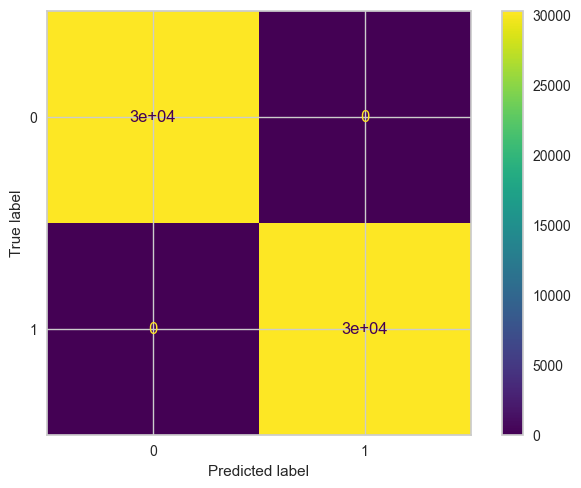

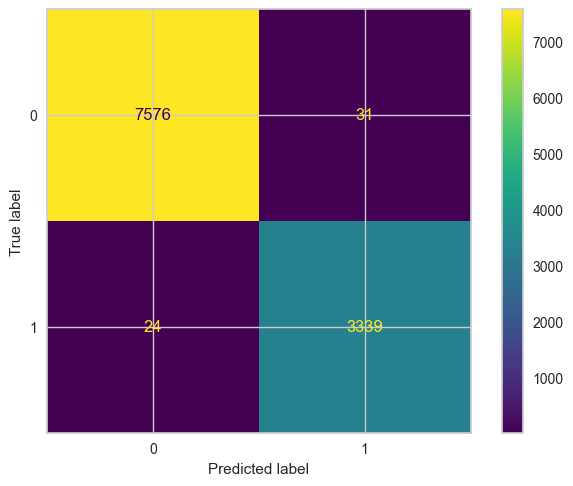

In [45]:
# Memperlihatkan confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix Data Train: \n', cm_train)
print(classification_report(y_train, y_pred_train))

cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix Data Test: \n', cm_test)
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay(cm_train).plot()
ConfusionMatrixDisplay(cm_test).plot()

In [46]:
y_pred = model_klasifikasi.predict_proba(X_test_final_df)
y_pred

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [47]:
accuracy = model_klasifikasi.score(X_test_final_df, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9949863263445761


### Feature Importance

In [48]:
importance = model_klasifikasi.feature_importances_
feature_names = [i for i in X_train_final_df.columns]

forest_importances = pd.DataFrame({"feature_names":feature_names,"importance":importance})

forest_importances["importance"] = forest_importances["importance"] * 100
forest_importances.sort_values(by='importance', ascending=False)

feature_names  importance
30    LoanFirstDefaultedCycleNumber   98.759390
32               MonthlyLoanPayment    0.364016
0                              Term    0.149090
7       OpenRevolvingMonthlyPayment    0.051756
9                    TotalInquiries    0.049562
..                              ...         ...
116                BorrowerState_WI    0.000000
117                BorrowerState_WV    0.000000
118                BorrowerState_WY    0.000000
14        PublicRecordsLast12Months    0.000000
132  Occupation_Computer Programmer    0.000000

[238 rows x 2 columns]

Dari tabel diatas, nilai importance sangat tinggi, sehingga dicoba dihilangkan agar dapat tidak tergantung dengan feature tersebut

In [49]:
X_train_final_df_drop = X_train_final_df.drop(['LoanFirstDefaultedCycleNumber'], axis=1)
X_test_final_df_drop = X_test_final_df.drop(['LoanFirstDefaultedCycleNumber'], axis=1)
X_train_final_df_drop.shape

(60522, 237)

In [50]:
model_klasifikasi.fit (X_train_final_df_drop, y_train)

DecisionTreeClassifier(random_state=1509)

In [51]:
y_pred_train = model_klasifikasi.predict(X_train_final_df_drop)
y_pred_test = model_klasifikasi.predict(X_test_final_df_drop)

Confusion Matrix Data Train: 
 [[30261     0]
 [    0 30261]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30261
           1       1.00      1.00      1.00     30261

    accuracy                           1.00     60522
   macro avg       1.00      1.00      1.00     60522
weighted avg       1.00      1.00      1.00     60522

Confusion Matrix Data Test: 
 [[6909  698]
 [ 565 2798]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7607
           1       0.80      0.83      0.82      3363

    accuracy                           0.88     10970
   macro avg       0.86      0.87      0.87     10970
weighted avg       0.89      0.88      0.89     10970



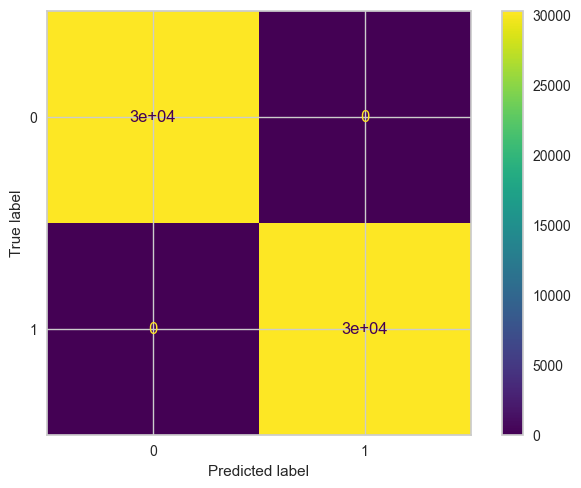

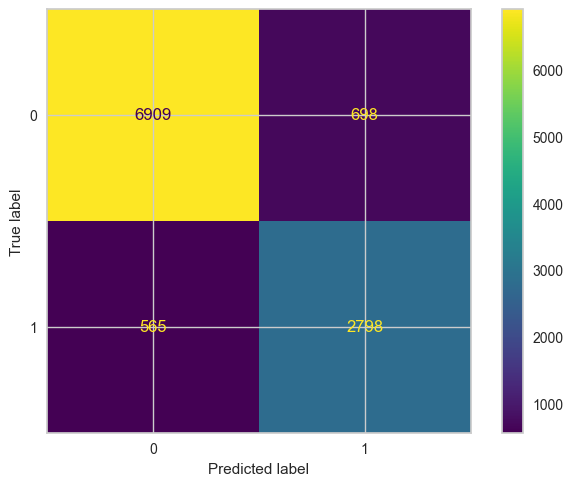

In [52]:
# Memperlihatkan confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix Data Train: \n', cm_train)
print(classification_report(y_train, y_pred_train))

cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix Data Test: \n', cm_test)
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay(cm_train).plot()
ConfusionMatrixDisplay(cm_test).plot()

#### Improvisasi 1

In [53]:
importance_1 = model_klasifikasi.feature_importances_
feature_names_1 = [i for i in X_train_final_df_drop.columns]

forest_importances_1 = pd.DataFrame({"feature_names":feature_names_1,"importance":importance_1})

forest_importances_1["importance"] = forest_importances_1["importance"]*100
forest_importances_1.sort_values(by='importance', ascending=False)

feature_names  importance
235       kategori_nasabah_payment_< 2000   39.184048
31                     MonthlyLoanPayment   17.983745
234  kategori_nasabah_payment_2000 ~ 4999   12.041510
30             LoanMonthsSinceOrigination    3.029117
0                                    Term    2.562032
..                                    ...         ...
117                      BorrowerState_WY    0.000000
113                      BorrowerState_VT    0.000000
206        LoanOriginationQuarter_Q1 2012    0.000000
208        LoanOriginationQuarter_Q1 2014    0.000000
207        LoanOriginationQuarter_Q1 2013    0.000000

[237 rows x 2 columns]

Model ini sudah nilai importancenya sudah tidak diatas 50%, sehingga dapat digunakan. Selanjutnya menghilangkan yang nilai importancenya itu dibawah 1%

In [54]:
filter_forest_importances_1 = forest_importances_1[forest_importances_1["importance"] < 1.5 ]
filter_forest_importances_1.sort_values(by='importance', ascending=False)

feature_names  importance
36                               Investors    1.150002
9                           TotalInquiries    1.081937
22                     StatedMonthlyIncome    1.070210
8                     InquiriesLast6Months    1.010480
7              OpenRevolvingMonthlyPayment    0.808740
..                                     ...         ...
208         LoanOriginationQuarter_Q1 2014    0.000000
179              Occupation_Teacher's Aide    0.000000
177  Occupation_Student - Technical School    0.000000
56         ListingCategory_Large Purchases    0.000000
47           ListingCategory_Baby&Adoption    0.000000

[230 rows x 2 columns]

In [55]:
kolom_didrop = filter_forest_importances_1['feature_names']
kolom_didrop

2               EstimatedEffectiveYield
3                       EstimatedReturn
4                          ProsperScore
5              EmploymentStatusDuration
6                    CurrentCreditLines
                     ...               
230      LoanOriginationQuarter_Q4 2010
231      LoanOriginationQuarter_Q4 2011
232      LoanOriginationQuarter_Q4 2012
233      LoanOriginationQuarter_Q4 2013
236    kategori_nasabah_payment_>= 5000
Name: feature_names, Length: 230, dtype: object

In [56]:
X_train_final_df_drop_1 = X_train_final_df_drop.drop(kolom_didrop, axis=1)
X_test_final_df_drop_1 = X_test_final_df_drop.drop(kolom_didrop, axis=1)
X_train_final_df_drop_1.shape

(60522, 7)

In [57]:
model_klasifikasi.fit (X_train_final_df_drop_1, y_train)

DecisionTreeClassifier(random_state=1509)

In [58]:
y_pred_train_drop_1 = model_klasifikasi.predict(X_train_final_df_drop_1)
y_pred_test_drop_1 = model_klasifikasi.predict(X_test_final_df_drop_1)

Confusion Matrix Data Train: 
 [[30219    42]
 [  350 29911]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30261
           1       1.00      0.99      0.99     30261

    accuracy                           0.99     60522
   macro avg       0.99      0.99      0.99     60522
weighted avg       0.99      0.99      0.99     60522

Confusion Matrix Data Test: 
 [[6875  732]
 [ 555 2808]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7607
           1       0.79      0.83      0.81      3363

    accuracy                           0.88     10970
   macro avg       0.86      0.87      0.86     10970
weighted avg       0.88      0.88      0.88     10970



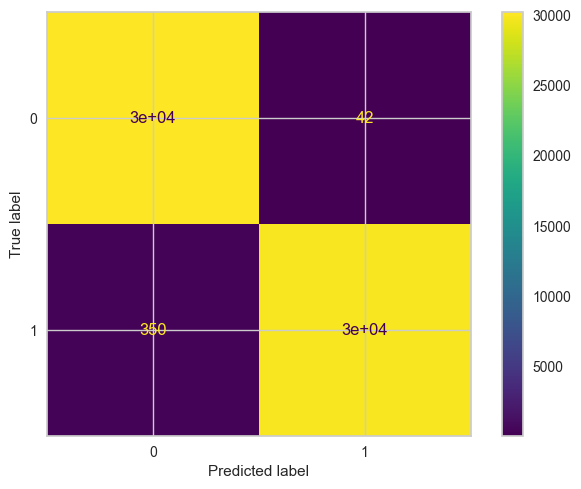

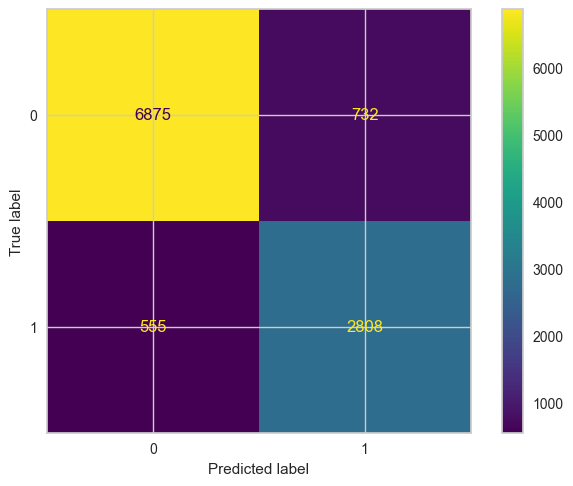

In [59]:
# Memperlihatkan confusion_matrix
cm_train_drop_1 = confusion_matrix(y_train, y_pred_train_drop_1)
print('Confusion Matrix Data Train: \n', cm_train_drop_1)
print(classification_report(y_train, y_pred_train_drop_1))

cm_test_drop_1 = confusion_matrix(y_test, y_pred_test_drop_1)
print('Confusion Matrix Data Test: \n', cm_test_drop_1)
print(classification_report(y_test, y_pred_test_drop_1))

ConfusionMatrixDisplay(cm_train_drop_1).plot()
ConfusionMatrixDisplay(cm_test_drop_1).plot()

#### Improvisasi 2

In [60]:
importance_2 = model_klasifikasi.feature_importances_
feature_names_2 = [i for i in X_test_final_df_drop_1.columns]

forest_importances_2 = pd.DataFrame({"feature_names":feature_names_2,"importance":importance_2})

forest_importances_2["importance"] = forest_importances_2["importance"] * 100
forest_importances_2.sort_values(by='importance', ascending=False)

feature_names  importance
6       kategori_nasabah_payment_< 2000   39.798051
4                    MonthlyLoanPayment   24.344507
5  kategori_nasabah_payment_2000 ~ 4999   12.879683
3            LoanMonthsSinceOrigination    9.011237
1                          BorrowerRate    7.405929
2                  CurrentDelinquencies    3.939164
0                                  Term    2.621428

## Cross Validation


In [61]:
score_train_cross_val_klasifikasi = cross_val_score (model_klasifikasi,
                                            X_train_final_df_drop_1, 
                                            y_train,
                                            cv=3)
print('Score - Mean - Cross Validation : ', score_train_cross_val_klasifikasi.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_klasifikasi.std())

Score - Mean - Cross Validation :  0.89142791051188
Score - Std - Cross Validation  :  0.013942268274985898


# vi. Model Regresi

Membuat dataframe yang hanya berisi Chargedoff dan Defaulted, karena akan digunakan untuk perdiksi regresi

In [62]:
data_defaulted = data[(data['LoanStatus'] == 'Chargedoff') | 
                      (data['LoanStatus'] == 'Defaulted')]

data_defaulted = data_defaulted.drop(columns=['LoanStatus'], axis=1)

Membuat kolom target

In [63]:
data_defaulted['LossRate'] = (data_defaulted['LoanOriginalAmount'] - data_defaulted['LP_CustomerPrincipalPayments']) / data_defaulted['LoanOriginalAmount'] * 100
data_defaulted['LossRate'] =np.where(data_defaulted['LossRate'] < 0, 0,
                            np.where(data_defaulted['LossRate'] > 100, 100,
                            data_defaulted['LossRate']))

data_defaulted = data_defaulted[data_defaulted["LossRate"] > 0]
data_defaulted.reset_index(drop=True)

ListingKey  ListingNumber ListingCreationDate CreditGrade  \
0      A66F3364632427736031107           6328             35:35.9           D   
1      F737336598792393701AF04          11094             59:31.8           E   
2      749633653653673451C04EC          15935             39:40.6           E   
3      E0E1336552565037801A7E4          15873             36:20.6           E   
4      DFCC33661542209613B1A72          15742             36:15.9          HR   
...                        ...            ...                 ...         ...   
16975  8D0233958630756585E70A4         172935             37:58.1          AA   
16976  2DE63390304421824E2ACDE         148494             02:32.5           B   
16977  8AB73407661559859490118         253881             24:21.5           B   
16978  8F5E338909714150518DF2B         134621             23:43.9           B   
16979                 7.48E+22         127169             46:25.5           B   

       Term       ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
0        36   9/22/2006 0:00      0.23497        0.2275       0.2225   
1        36  10/11/2006 0:00      0.24502        0.2375       0.2200   
2        36   12/4/2006 0:00      0.25757        0.2500       0.2325   
3        36   11/4/2006 0:00      0.22744        0.2200       0.2150   
4        36  11/10/2006 0:00      0.28771        0.2800       0.2750   
...     ...              ...          ...           ...          ...   
16975    36  10/31/2010 0:00      0.14307        0.1360       0.1210   
16976    36  10/13/2010 0:00      0.18726        0.1800       0.1700   
16977    36    9/2/2010 0:00      0.20383        0.1965       0.1865   
16978    36   7/23/2010 0:00      0.22643        0.2190       0.2090   
16979    36    9/7/2010 0:00      0.15713        0.1500       0.1350   

       EstimatedEffectiveYield  ...  LP_CollectionFees  LP_GrossPrincipalLoss  \
0                          NaN  ...             -80.77               10000.00   
1                          NaN  ...              -3.06                3001.00   
2                          NaN  ...               0.00                4700.00   
3                          NaN  ...               0.00                3000.00   
4                          NaN  ...               0.00                3100.00   
...                        ...  ...                ...                    ...   
16975                      NaN  ...               0.00                1683.61   
16976                      NaN  ...            -461.15                1388.64   
16977                      NaN  ...             -17.00                 895.67   
16978                      NaN  ...              -9.10                   3.03   
16979                      NaN  ...             -10.47                  10.84   

      LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments PercentFunded  \
0                 9004.98                          2755.12           1.0   
1                 3001.00                           100.00           1.0   
2                 4700.00                             0.00           1.0   
3                 3000.00                             0.00           1.0   
4                 3100.00                             0.00           1.0   
...                   ...                              ...           ...   
16975             1683.62                             0.00           1.0   
16976               -2.90                            82.75           1.0   
16977              925.66                             0.00           1.0   
16978              400.93                            30.99           1.0   
16979                0.00                            31.02           1.0   

      Recommendations InvestmentFromFriendsCount InvestmentFromFriendsAmount  \
0                   0                          0                         0.0   
1                   0                          0                         0.0   
2                   0                          0        

Mengecek korelasi antar kolom

<Axes: >

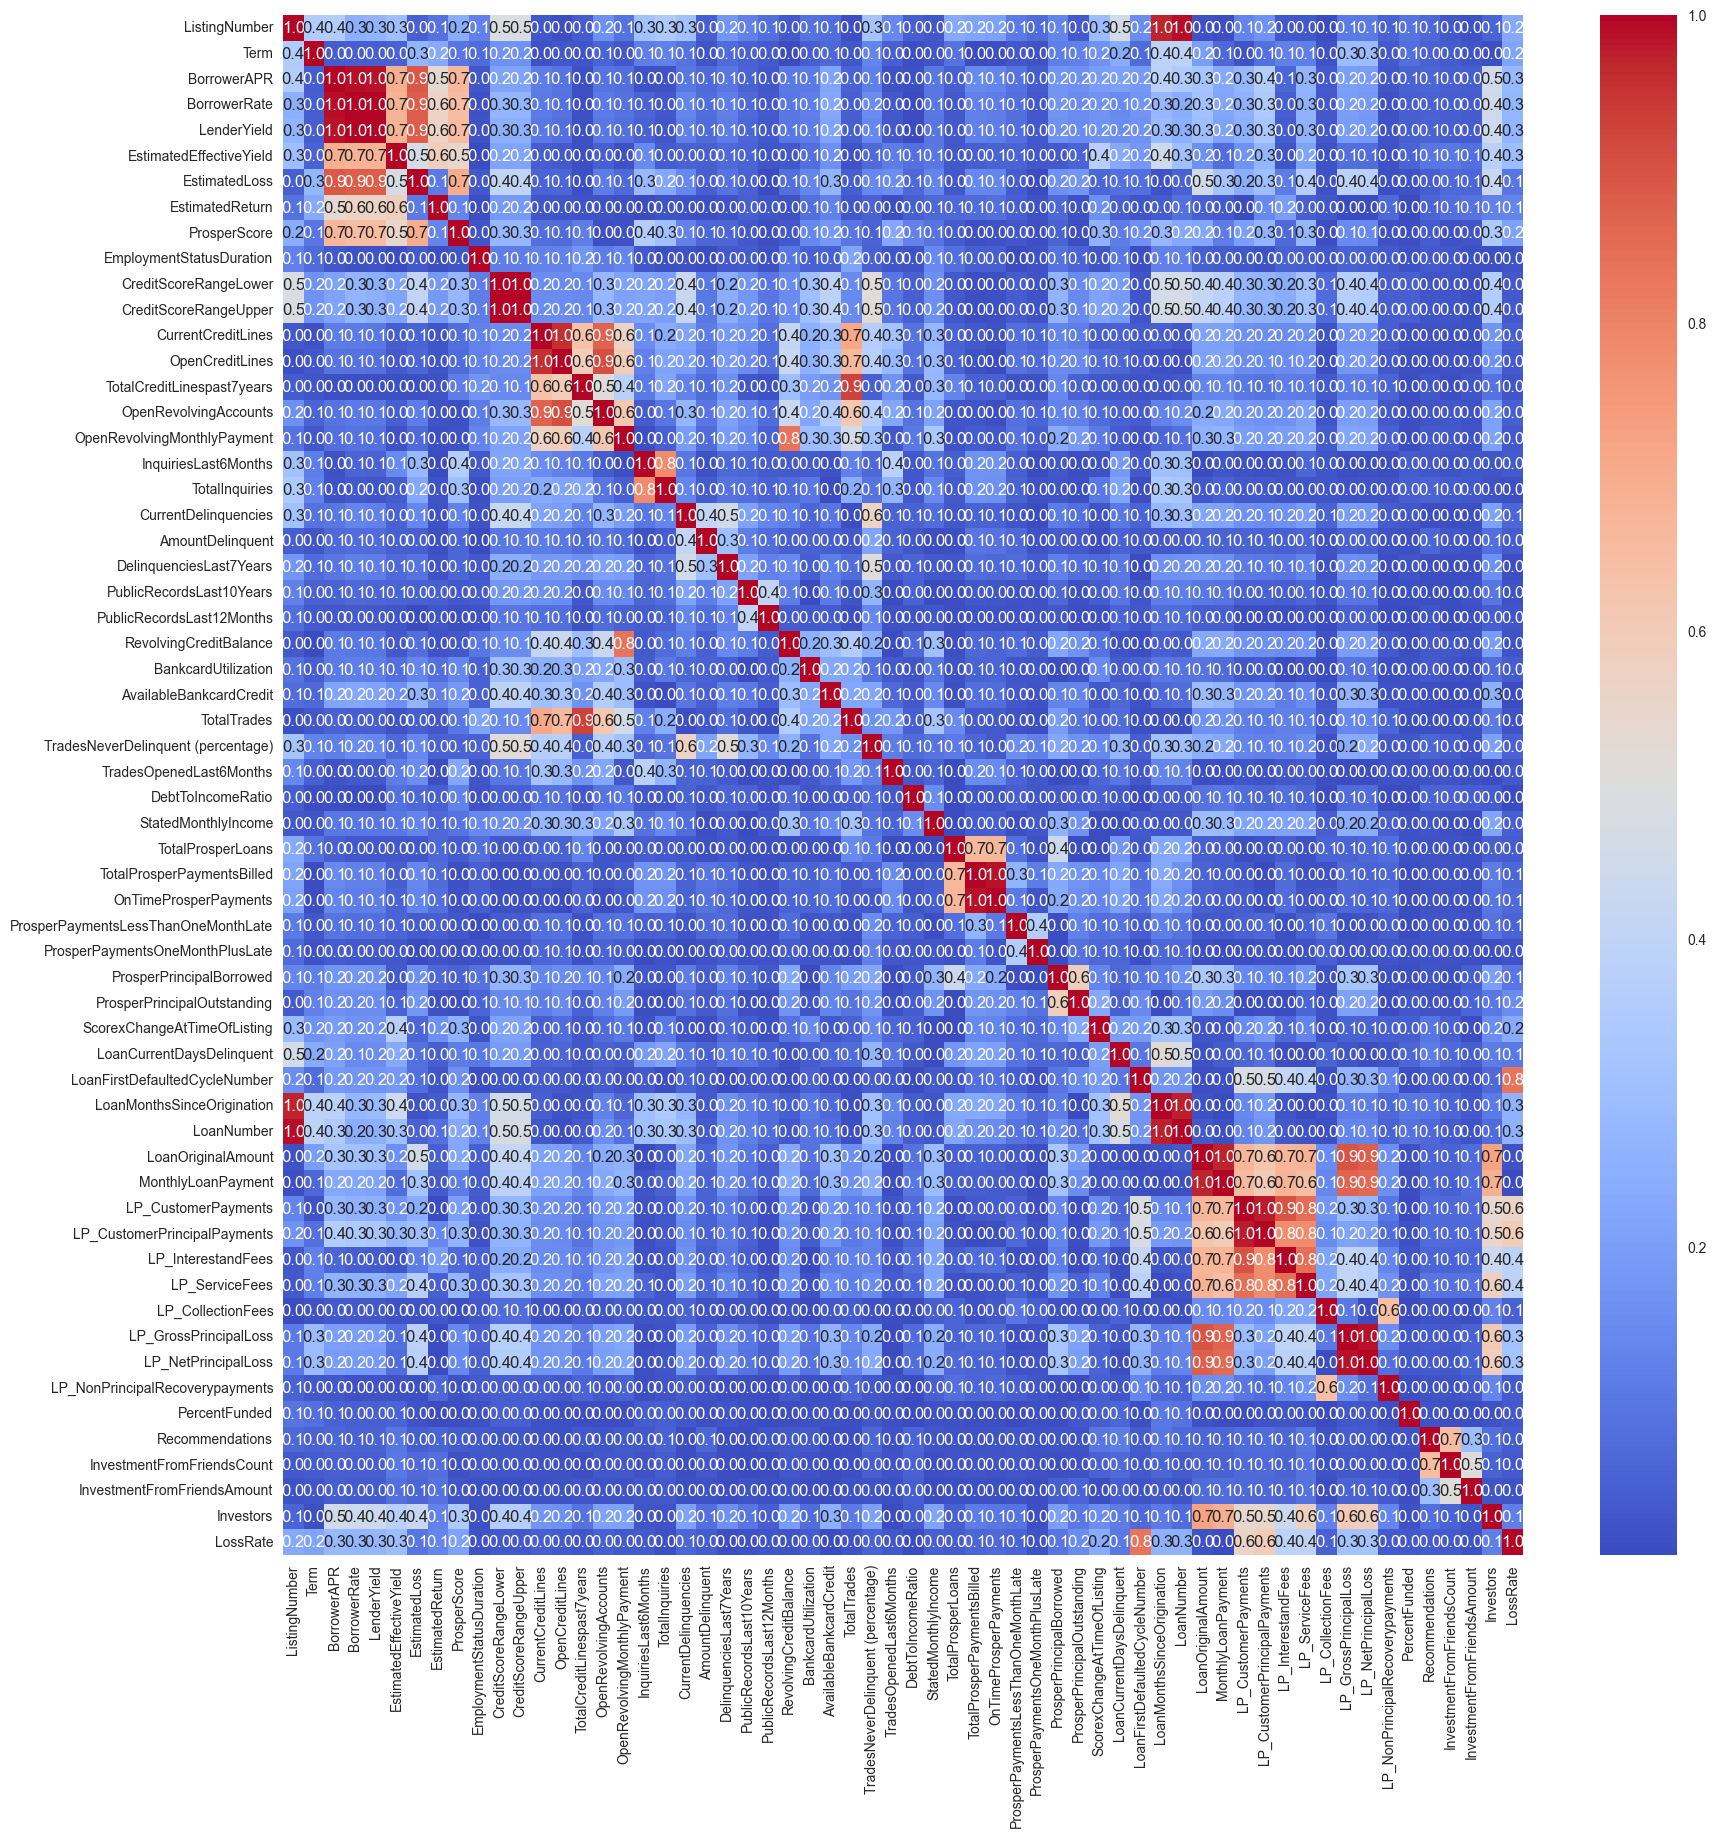

In [64]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_defaulted.select_dtypes(include=np.number).corr().abs(), annot=True, fmt=".1f", cmap="coolwarm")

Membuang kolom yang nilai korelasinya tinggi maupun yang 0

In [65]:
kolom_drop = [
    'ListingKey','ListingNumber','LoanKey','LoanNumber', 'GroupKey', 'MemberKey', # Nilai yang unique dan tidak penting karena hanya berupa ID nasabah
    'ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', # Hanya data waktu, tidak perlu digunakan
    'BorrowerAPR', 'LenderYield', # Antara BorrowerAPR, BorrowerRate, dan LenderYield memiliki nilai korelasi sangaat tinggi, jadi digunakan 1 kolom saja, saya pilih BorrowerRate
    'CreditScoreRangeUpper', #'CreditScoreRangeLower', 'CreditGrade', # Score predetermine dari sisi peminjam sehingga akan dihapus terlebih dahulu
    'OpenCreditLines', 'OpenRevolvingAccounts', # Memilih antara OpenCreditLines, CurrentCreditLines, atau OpenRevolingAccounts
    'OnTimeProsperPayments',      # Memilih antara OnTimeProsperPayments atau TotalTimeProsperPayments
    'MonthlyLoanPayment',
    'LP_CustomerPayments',        # Memilih antara LP_CustomerPayments atau LP_CustomerPrincipalPayments
    'LP_NetPrincipalLoss',        # Memilih antara LP_GrossPrincipalLoss atau LP_NetPrincipalLoss
    'LP_InterestandFees','LP_CollectionFees','LP_ServiceFees', 'LP_NonPrincipalRecoverypayments', # Berfokus pada Principal Payments karena hanya ingin berfokus pada satu jenis pembayaran
    'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'InquiriesLast6Months','TotalInquiries', 'AmountDelinquent',
    'DelinquenciesLast7Years',	'PublicRecordsLast10Years',	'PublicRecordsLast12Months',	'RevolvingCreditBalance',	'BankcardUtilization',
    'AvailableBankcardCredit',	'TotalTrades',	'TradesNeverDelinquent (percentage)',	'TradesOpenedLast6Months',	'DebtToIncomeRatio',
    'IncomeRange',	'IncomeVerifiable',	'StatedMonthlyIncome',	'LoanKey',	'TotalProsperLoans', 'OpenRevolvingAccounts', 'TotalProsperPaymentsBilled',
    'MonthlyLoanPayment','PercentFunded','Recommendations', 'InvestmentFromFriendsCount',	'InvestmentFromFriendsAmount', 'OpenRevolvingMonthlyPayment',
    'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate'
              ]

data_defaulted = data_defaulted.drop(kolom_drop, axis=1)
data_defaulted.shape


(16980, 29)

In [66]:
# Menggunakan Chi-square karena banyak data kategori
from scipy import stats
from tabulate import tabulate

kolom = data_defaulted.columns

contingency_tables = {} 
results_table = []

for i in kolom:
    contingency_table = pd.crosstab(data_defaulted[i], data_defaulted['LossRate'])
    contingency_tables[i] = contingency_table

    stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    if p > 0.05:
        result = 'Probably independent'
    else:
        result = 'Probably dependent'

    results_table.append([i, p, result])

table_headers = ['Column', 'p-value', 'Result']
print(tabulate(results_table, headers=table_headers))

Column                              p-value  Result
-----------------------------  ------------  --------------------
CreditGrade                    0.00645361    Probably dependent
Term                           0.00213814    Probably dependent
BorrowerRate                   0             Probably dependent
EstimatedEffectiveYield        0             Probably dependent
EstimatedLoss                  1.01022e-229  Probably dependent
EstimatedReturn                0             Probably dependent
ProsperRating                  2.32409e-13   Probably dependent
ProsperScore                   6.46696e-06   Probably dependent
ListingCategory                1             Probably independent
BorrowerState                  0.841043      Probably independent
Occupation                     0.202319      Probably independent
EmploymentStatus               0.709601      Probably independent
IsBorrowerHomeowner            0.304058      Probably independent
CurrentlyInGroup               0.0122297

In [67]:
kolom_drop = ['Term', 'ListingCategory', 'BorrowerState', 
              'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
              'TotalCreditLinespast7years','CurrentDelinquencies','ProsperPrincipalBorrowed',
              'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanMonthsSinceOrigination',
              'LoanOriginationQuarter']

data_defaulted.drop(columns=kolom_drop, inplace=True)

## Feature Engineering

### Split antara X (Feature) dan y (Target)

In [68]:
X = data_defaulted.drop (['LossRate'], axis=1)
y = data_defaulted['LossRate']

In [69]:
data_defaulted['LossRate']

1         100.000000
4         100.000000
6         100.000000
7         100.000000
8         100.000000
             ...    
113170      6.734480
113185      5.542920
113247      3.702640
113273      1.614520
113282      0.043246
Name: LossRate, Length: 16980, dtype: float64

### Split Train-Set dan Test-Set

In [70]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1509)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X Train Size (13584, 15)
X Test Size: (3396, 15)

y Train Size (13584,)
y Test Size: (3396,)


### Handle Missing Value

Melakukan analisa pada data yang hilang pada dataset

#### Pada data X_train

In [71]:
def missing_check(X_train):
    total = X_train.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_train.isnull().sum()/X_train.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_train)

Total    Percent
EstimatedEffectiveYield         8502  62.588339
EstimatedLoss                   8502  62.588339
EstimatedReturn                 8502  62.588339
ProsperScore                    8502  62.588339
CreditGrade                     5091  37.477915
Occupation                       648   4.770318
LoanFirstDefaultedCycleNumber     94   0.691991

Nilai persentase yang kurang dari 10%, akan dihilangkan barisnya, dan untuk yang lebih, akan diisi dengan nilai 0 ataupun teks kosong

In [72]:
# Mengisi dengan nilai 0 atau teks kosong
numeric_features_regresi = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features_regresi = X_train.select_dtypes(exclude=np.number).columns.tolist()

X_train[numeric_features_regresi] = X_train[numeric_features_regresi].fillna(0)
X_train[categorical_features_regresi] = X_train[categorical_features_regresi].fillna("")

#### Pada data X_test

In [73]:
def missing_check(X_test):
    total = X_test.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (X_test.isnull().sum()/X_test.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data

missing_check(X_test)

Total    Percent
EstimatedEffectiveYield         2150  63.309776
EstimatedLoss                   2150  63.309776
EstimatedReturn                 2150  63.309776
ProsperScore                    2150  63.309776
CreditGrade                     1246  36.690224
Occupation                       164   4.829211
LoanFirstDefaultedCycleNumber     18   0.530035

Dilakukan sama seperti pada data X_train

In [74]:
# Mengisi dengan nilai 0 atau teks kosong
X_test[numeric_features_regresi] = X_test[numeric_features_regresi].fillna(0)
X_test[categorical_features_regresi] = X_test[categorical_features_regresi].fillna("")

#### Pada data y_train

In [75]:
y_train.isnull().sum()

0

Tidak adanya nilai yang kosong pada y_train

#### Pada data y_test

In [76]:
y_test.isnull().sum()

0

Tidak adanya nilai yang kosong pada y_test

### Feature Selection

In [77]:
# Menghilangkan data di yang hilang saat handling missing value
y_train = y_train.filter(items=X_train.index,axis=0)
y_test = y_test.filter(items=X_test.index,axis=0)

In [78]:
# Melihat kolom berdasarkan tipe
numeric_features_regresi = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features_regresi = X_train.select_dtypes(exclude=np.number).columns.tolist()

print ('Kolom numeric : ', numeric_features_regresi)
print ('Kolom kategori : ', categorical_features_regresi)

Kolom numeric :  ['BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanOriginalAmount', 'LP_CustomerPrincipalPayments', 'LP_GrossPrincipalLoss', 'Investors']
Kolom kategori :  ['CreditGrade', 'ProsperRating', 'Occupation', 'CurrentlyInGroup']


In [79]:
# Memisahkan train-set dan test-set berdasarkan tipe kolom
X_train_num = X_train[numeric_features_regresi]
X_train_cat = X_train[categorical_features_regresi]

X_test_num = X_test[numeric_features_regresi]
X_test_cat = X_test[categorical_features_regresi]

#### Scaling

In [80]:
scaler_regresi = MinMaxScaler()

X_train_num_scaled = scaler_regresi.fit_transform(X_train_num)
X_test_num_scaled = scaler_regresi.transform(X_test_num)

#### Encoding

In [81]:
encoder_regresi = OneHotEncoder(handle_unknown = 'ignore')

X_train_cat_encoded = encoder_regresi.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder_regresi.transform(X_test_cat).toarray()

In [82]:
# Menggabungkan numerik dan kategori
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final.shape

(13584, 97)

In [83]:
numeric_feature_names_regresi = numeric_features_regresi
categorical_feature_names_regresi = encoder_regresi.get_feature_names_out(categorical_features_regresi)

all_feature_names_regresi = numeric_feature_names_regresi + list(categorical_feature_names_regresi)

X_train_final_df = pd.DataFrame(X_train_final, columns=all_feature_names_regresi)
X_test_final_df = pd.DataFrame (X_test_final, columns=all_feature_names_regresi)
X_train_final_df

BorrowerRate  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0          0.520625                 0.828714       0.325137         0.681213   
1          0.354167                 0.362114       0.000000         0.417088   
2          0.479167                 0.362114       0.000000         0.417088   
3          0.265625                 0.362114       0.000000         0.417088   
4          0.517500                 0.815952       0.383880         0.617134   
...             ...                      ...            ...              ...   
13579      0.415417                 0.362114       0.000000         0.417088   
13580      0.572917                 0.662014       0.295082         0.762517   
13581      0.416667                 0.362114       0.000000         0.417088   
13582      0.661875                 0.939581       0.450820         0.703261   
13583      0.603958                 0.362114       0.000000         0.417088   

       ProsperScore  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0          0.545455                   0.172771                       0.227273   
1          0.000000                   0.099519                       0.181818   
2          0.000000                   0.067333                       0.295455   
3          0.000000                   0.740289                       0.318182   
4          0.090909                   0.256382                       0.136364   
...             ...                        ...                            ...   
13579      0.000000                   0.667777                       0.318182   
13580      0.636364                   0.424343                       0.159091   
13581      0.000000                   0.053274                       0.159091   
13582      0.454545                   0.133925                       0.340909   
13583      0.000000                   0.754717                       0.159091   

       LoanOriginalAmount  LP_CustomerPrincipalPayments  \
0                0.458333                      0.021003   
1                0.000000                      0.002608   
2                0.000000                      0.005620   
3                1.000000                      0.216003   
4                0.125000                      0.012067   
...                   ...                           ...   
13579            0.166667                      0.041174   
13580            0.083333                      0.002224   
13581            0.083333                      0.004960   
13582            0.125000                      0.022532   
13583            0.022917                      0.002223   

       LP_GrossPrincipalLoss  ...  Occupation_Teacher  \
0                   0.459048  ...                 0.0   
1                   0.037398  ...                 0.0   
2                   0.034394  ...                 0.0   
3                   0.784522  ...                 0.0   
4                   0.147963  ...                 0.0   
...                      ...  ...                 ...   
13579               0.158926  ...                 0.0   
13580               0.117781  ...                 0.0   
13581               0.115052  ...                 0.0   
13582               0.137523  ...                 0.0   
13583               0.059782  ...                 0.0   

       Occupation_Teacher's Aide  Occupation_Tradesman - Carpenter  \
0                            0.0                               0.0   
1                            0.0                               0.0   
2                            0.0                               0.0   
3                            0.0                               0.0   
4                            0.0                               0.0   
...                          ...                               ...   
13579                        0.0                               0.0   
13580                        0.0                               0.0   
13581                        0.0                 

## Model Definition

In [84]:
model_regresi = LinearRegression()

## Model Training

In [85]:
model_regresi.fit (X_train_final_df, y_train)

LinearRegression()

## Model Evaluation

In [86]:
y_pred_train = model_regresi.predict(X_train_final_df)
y_pred_test = model_regresi.predict(X_test_final_df)

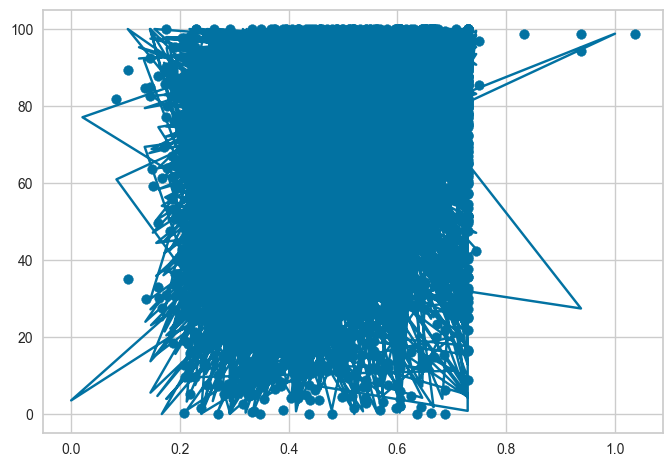

In [88]:
plt.scatter(X_test_final_df.iloc[:5000, 0], y_test[:5000])
plt.plot(X_train_final[:5000, 0], y_train[:5000])
plt.show()

In [87]:
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test Set : ', mean_absolute_error(y_test, y_pred_test))

Error - Train Set :  6.436663799354782
Error - Test Set :  6.547200067449535


# vii. Data Belum ditentukan

## Klasifikasi

In [111]:
data_belum_ditentukan_klasifikasi = data_belum_ditentukan.copy()

In [112]:
kolom_drop = ['ListingKey','ListingNumber','LoanKey','LoanNumber', 'GroupKey', 'MemberKey', # Nilai yang unique dan tidak penting karena hanya berupa ID nasabah
              'BorrowerAPR', 'LenderYield', # Antara BorrowerAPR, BorrowerRate, dan LenderYield memiliki nilai korelasi sangaat tinggi, jadi digunakan 1 kolom saja, saya pilih BorrowerRate
              'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'CreditGrade', # Score predetermine dari sisi peminjam sehingga akan dihapus terlebih dahulu
              'OpenCreditLines', 'OpenRevolvingAccounts', # Memilih antara OpenCreditLines, CurrentCreditLines, atau OpenRevolingAccounts
              'OnTimeProsperPayments',      # Memilih antara OnTimeProsperPayments atau TotalTimeProsperPayments
              'LP_NetPrincipalLoss',        # Memilih antara LP_GrossPrincipalLoss atau LP_NetPrincipalLoss
              'LP_CustomerPayments',         # Memilih antara LP_CustomerPayments atau LP_CustomerPrincipalPayments
              'LP_InterestandFees','LP_CollectionFees','LP_ServiceFees', 'LP_NonPrincipalRecoverypayments', # Berfokus pada Principal Payments karena hanya ingin berfokus pada satu jenis pembayaran
              'ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', # Hanya data waktu, tidak perlu digunakan
              'EstimatedLoss', 'LoanOriginalAmount', 'TotalCreditLinespast7years', # Nilai korelasi tinggi
              'IncomeRange', # Memiliki arti bisnis yang sama dengan StatedMonthlyIncome
              'LoanCurrentDaysDelinquent','LP_GrossPrincipalLoss', # Didrop karena korelasi terhadap target terlalu kuat, sehingga dikhawatirkan akan menjadi fitur yang terlalu dominan
              'LoanStatus',
              ]

data_belum_ditentukan_klasifikasi = data_belum_ditentukan_klasifikasi.drop (kolom_drop, axis=1)
data_belum_ditentukan_klasifikasi.shape

(112726, 48)

In [113]:
def kategori_nasabah_payment(payment):
    if payment < 2000:
        return "< 2000"
    elif 2000 <= payment < 5000:
        return "2000 ~ 4999"
    else:
        return ">= 5000"

data_belum_ditentukan_klasifikasi['kategori_nasabah_payment'] = data_belum_ditentukan_klasifikasi['LP_CustomerPrincipalPayments'].apply(kategori_nasabah_payment)

data_belum_ditentukan_klasifikasi = data_belum_ditentukan_klasifikasi.drop(columns=['LP_CustomerPrincipalPayments'])

In [114]:
data_belum_ditentukan_klasifikasi[numeric_features_klasifikasi] = data_belum_ditentukan_klasifikasi[numeric_features_klasifikasi].fillna(0)
data_belum_ditentukan_klasifikasi[categorical_features_klasifikasi] = data_belum_ditentukan_klasifikasi[categorical_features_klasifikasi].fillna("")

In [115]:
klasifikasi_num = data_belum_ditentukan_klasifikasi[numeric_features_klasifikasi]
klasifikasi_cat = data_belum_ditentukan_klasifikasi[categorical_features_klasifikasi]

Scaling

In [116]:
klasifikasi_num_scaled = scaler_klasifikasi.transform(klasifikasi_num)

Encoding

In [117]:
klasifikasi_cat_encoded = encoder_klasifikasi.transform(klasifikasi_cat).toarray()

In [118]:
klasifikasi_final = np.concatenate([klasifikasi_num_scaled, klasifikasi_cat_encoded], axis=1)
klasifikasi_final

array([[0.5       , 0.40201005, 0.36211366, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.45728643, 0.36211366, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.47738693, 0.36211366, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.25105528, 0.5819342 , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.28120603, 0.60897308, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.19075377, 0.52693918, ..., 0.        , 0.        ,
        1.        ]])

In [119]:
klasifikasi_final_df = pd.DataFrame(klasifikasi_final, columns=all_feature_names_klasifikasi)
klasifikasi_final_df

Term  BorrowerRate  EstimatedEffectiveYield  EstimatedReturn  \
0        0.5      0.402010                 0.362114         0.390286   
1        0.5      0.457286                 0.362114         0.390286   
2        0.5      0.477387                 0.362114         0.390286   
3        0.5      0.280402                 0.362114         0.390286   
4        0.5      0.477387                 0.362114         0.390286   
...      ...           ...                      ...              ...   
112721   1.0      0.365628                 0.684945         0.609499   
112722   1.0      0.220905                 0.554536         0.533419   
112723   1.0      0.251055                 0.581934         0.546830   
112724   1.0      0.281206                 0.608973         0.559854   
112725   0.5      0.190754                 0.526939         0.519794   

        ProsperScore  EmploymentStatusDuration  CurrentCreditLines  \
0           0.000000                  0.000000            0.000000   
1           0.000000                  0.000000            0.000000   
2           0.000000                  0.000000            0.000000   
3           0.000000                  0.000000            0.000000   
4           0.000000                  0.000000            0.000000   
...              ...                       ...                 ...   
112721      0.636364                  0.078146            0.254237   
112722      0.909091                  0.094040            0.254237   
112723      1.000000                  0.042384            0.203390   
112724      0.727273                  0.086093            0.186441   
112725      1.000000                  0.047682            0.288136   

        OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                          0.000000              0.000000        0.000000   
1                          0.000000              0.000000        0.000000   
2                          0.000000              0.114286        0.000000   
3                          0.000000              0.009524        0.000000   
4                          0.000000              0.114286        0.000000   
...                             ...                   ...             ...   
112721                     0.011545              0.000000        0.021220   
112722                     0.028428              0.000000        0.013263   
112723                     0.060861              0.000000        0.021220   
112724                     0.023423              0.019048        0.013263   
112725                     0.009943              0.000000        0.002653   

        ...  LoanOriginationQuarter_Q4 2007  LoanOriginationQuarter_Q4 2008  \
0       ...                             0.0                             0.0   
1       ...                             0.0                             0.0   
2       ...                             0.0                             0.0   
3       ...                             0.0                             0.0   
4       ...                             0.0                             0.0   
...     ...                             ...                             ...   
112721  ...                             0.0                             0.0   
112722  ...                             0.0                             0.0   
112723  ...                             0.0                             0.0   
112724  ...                             0.0                             0.0   
112725  ...                             0.0                             0.0   

        LoanOriginationQuarter_Q4 2009  LoanOriginationQuarter_Q4 2010  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                    

In [120]:
kolom_data_klasifikasi = ['Term',
                          'BorrowerRate',
                          'CurrentDelinquencies',
                          'LoanMonthsSinceOrigination',
                          'MonthlyLoanPayment',
                          'kategori_nasabah_payment_2000 ~ 4999',
                          'kategori_nasabah_payment_< 2000',
                          ]

klasifikasi_final_df = klasifikasi_final_df[kolom_data_klasifikasi]

In [121]:
pred_klasifikasi = model_klasifikasi.predict_proba(klasifikasi_final_df)
prediksi_klasifikasi = pred_klasifikasi[:, 1]
prediksi_klasifikasi

array([1., 1., 1., ..., 0., 0., 0.])

## Regresi

In [122]:
data_belum_ditentukan_regresi = data_belum_ditentukan.copy()

In [123]:
data_belum_ditentukan_regresi = data_belum_ditentukan_regresi.drop(columns=['LoanStatus'], axis=1)

In [124]:
data_belum_ditentukan_regresi['LossRate'] = (data_belum_ditentukan_regresi['LoanOriginalAmount'] - data_belum_ditentukan_regresi['LP_CustomerPrincipalPayments']) / data_belum_ditentukan_regresi['LoanOriginalAmount'] * 100
data_belum_ditentukan_regresi['LossRate'] =np.where(data_belum_ditentukan_regresi['LossRate'] < 0, 0,
                            np.where(data_belum_ditentukan_regresi['LossRate'] < 1, 1,
                            np.where(data_belum_ditentukan_regresi['LossRate'] > 100, 100,
                            data_belum_ditentukan_regresi['LossRate'])))

data_belum_ditentukan_regresi.reset_index(drop=True)

ListingKey  ListingNumber ListingCreationDate  \
0       09E1336627538645259AE42            908             18:58.5   
1       A66F3364632427736031107           6328             35:35.9   
2       093D3365430569291709120           8912             23:10.1   
3       F77F33664545520971829DC           7646             59:15.2   
4       F737336598792393701AF04          11094             59:31.8   
...                         ...            ...                 ...   
112721  D01735804705532725E9C17         793414             23:25.5   
112722  75CB3586158361687FEB10C         864630             20:10.9   
112723  DAE435899343502411826FD         908411             56:19.5   
112724  175F3592204159489436B1F         964821             52:44.1   
112725  53AE359481412617687A5EF         999068             21:38.8   

       CreditGrade  Term       ClosedDate  BorrowerAPR  BorrowerRate  \
0               HR    36   3/29/2006 0:00      0.20735        0.2000   
1                D    36   9/22/2006 0:00      0.23497        0.2275   
2               HR    36   5/31/2006 0:00      0.25650        0.2375   
3                C    36   5/31/2006 0:00      0.14659        0.1395   
4                E    36  10/11/2006 0:00      0.24502        0.2375   
...            ...   ...              ...          ...           ...   
112721         NaN    60   7/18/2013 0:00      0.20593        0.1819   
112722         NaN    60   2/24/2014 0:00      0.13227        0.1099   
112723         NaN    60   12/4/2013 0:00      0.14760        0.1249   
112724         NaN    60   11/6/2013 0:00      0.16294        0.1399   
112725         NaN    36    1/3/2014 0:00      0.12274        0.0949   

        LenderYield  EstimatedEffectiveYield  ...  LP_CollectionFees  \
0            0.1950                      NaN  ...               0.00   
1            0.2225                      NaN  ...             -80.77   
2            0.2325                      NaN  ...               0.00   
3            0.1345                      NaN  ...               0.00   
4            0.2200                      NaN  ...              -3.06   
...             ...                      ...  ...                ...   
112721       0.1719                  0.16190  ...               0.00   
112722       0.0999                  0.09650  ...               0.00   
112723       0.1149                  0.11024  ...               0.00   
112724       0.1299                  0.12380  ...               0.00   
112725       0.0849                  0.08266  ...               0.00   

        LP_GrossPrincipalLoss LP_NetPrincipalLoss  \
0                         0.0                0.00   
1                     10000.0             9004.98   
2                         0.0                0.00   
3                         0.0                0.00   
4                      3001.0             3001.00   
...                       ...                 ...   
112721                    0.0                0.00   
112722                    0.0                0.00   
112723                    0.0                0.00   
112724                    0.0                0.00   
112725                    0.0                0.00   

        LP_NonPrincipalRecoverypayments PercentFunded Recommendations  \
0                                  0.00           1.0               0   
1                               2755.12           1.0               0   
2                                  0.00           1.0               0   
3                                  0.00           1.0               0   
4                                100.00           1.0               0   
...                                 ...           ...             ...   
112721                             0.00           1.0               0   
112722                             0.00           1.0               0   
112723                             0.00           1.0               0   
112724                             0.00           1.0               0   
112725    

In [125]:
kolom_drop = [
    'ListingKey','ListingNumber','LoanKey','LoanNumber', 'GroupKey', 'MemberKey', # Nilai yang unique dan tidak penting karena hanya berupa ID nasabah
    'ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', # Hanya data waktu, tidak perlu digunakan
    'BorrowerAPR', 'LenderYield', # Antara BorrowerAPR, BorrowerRate, dan LenderYield memiliki nilai korelasi sangaat tinggi, jadi digunakan 1 kolom saja, saya pilih BorrowerRate
    'CreditScoreRangeUpper', #'CreditScoreRangeLower', 'CreditGrade', # Score predetermine dari sisi peminjam sehingga akan dihapus terlebih dahulu
    'OpenCreditLines', 'OpenRevolvingAccounts', # Memilih antara OpenCreditLines, CurrentCreditLines, atau OpenRevolingAccounts
    'OnTimeProsperPayments',      # Memilih antara OnTimeProsperPayments atau TotalTimeProsperPayments
    'MonthlyLoanPayment',
    'LP_CustomerPayments',        # Memilih antara LP_CustomerPayments atau LP_CustomerPrincipalPayments
    'LP_NetPrincipalLoss',        # Memilih antara LP_GrossPrincipalLoss atau LP_NetPrincipalLoss
    'LP_InterestandFees','LP_CollectionFees','LP_ServiceFees', 'LP_NonPrincipalRecoverypayments', # Berfokus pada Principal Payments karena hanya ingin berfokus pada satu jenis pembayaran
    'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'InquiriesLast6Months','TotalInquiries', 'AmountDelinquent',
    'DelinquenciesLast7Years',	'PublicRecordsLast10Years',	'PublicRecordsLast12Months',	'RevolvingCreditBalance',	'BankcardUtilization',
    'AvailableBankcardCredit',	'TotalTrades',	'TradesNeverDelinquent (percentage)',	'TradesOpenedLast6Months',	'DebtToIncomeRatio',
    'IncomeRange',	'IncomeVerifiable',	'StatedMonthlyIncome',	'LoanKey',	'TotalProsperLoans', 'OpenRevolvingAccounts', 'TotalProsperPaymentsBilled',
    'MonthlyLoanPayment','PercentFunded','Recommendations', 'InvestmentFromFriendsCount',	'InvestmentFromFriendsAmount', 'OpenRevolvingMonthlyPayment',
    'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate'
              ]

data_belum_ditentukan_regresi = data_belum_ditentukan_regresi.drop(kolom_drop, axis=1)
data_belum_ditentukan_regresi.shape


(112726, 29)

In [126]:
kolom_drop = ['Term', 'ListingCategory', 'BorrowerState', 
              'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
              'TotalCreditLinespast7years','CurrentDelinquencies','ProsperPrincipalBorrowed',
              'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanMonthsSinceOrigination',
              'LoanOriginationQuarter']

data_belum_ditentukan_regresi.drop(columns=kolom_drop, inplace=True)
data_belum_ditentukan_regresi.shape

(112726, 16)

In [127]:
data_belum_ditentukan_regresi[numeric_features_regresi] = data_belum_ditentukan_regresi[numeric_features_regresi].fillna(0)
data_belum_ditentukan_regresi[categorical_features_regresi] = data_belum_ditentukan_regresi[categorical_features_regresi].fillna("")

In [128]:
regresi_num = data_belum_ditentukan_regresi[numeric_features_regresi]
regresi_cat = data_belum_ditentukan_regresi[categorical_features_regresi]

Scaling

In [129]:
regresi_num_scaled = scaler_regresi.transform(regresi_num)

Encoding

In [130]:
regresi_cat_encoded = encoder_regresi.transform(regresi_cat).toarray()

In [131]:
regresi_final = np.concatenate([regresi_cat_encoded, regresi_num_scaled], axis=1)

In [132]:
regresi_final_df = pd.DataFrame (regresi_final, columns=all_feature_names_regresi)
regresi_final_df

BorrowerRate  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                0.0                      0.0            0.0              0.0   
1                0.0                      0.0            0.0              0.0   
2                0.0                      0.0            0.0              0.0   
3                0.0                      0.0            0.0              0.0   
4                0.0                      0.0            0.0              0.0   
...              ...                      ...            ...              ...   
112721           1.0                      0.0            0.0              0.0   
112722           1.0                      0.0            0.0              0.0   
112723           1.0                      0.0            0.0              0.0   
112724           1.0                      0.0            0.0              0.0   
112725           1.0                      0.0            0.0              0.0   

        ProsperScore  LoanCurrentDaysDelinquent  \
0                0.0                        0.0   
1                0.0                        1.0   
2                0.0                        0.0   
3                1.0                        0.0   
4                0.0                        0.0   
...              ...                        ...   
112721           0.0                        0.0   
112722           0.0                        0.0   
112723           0.0                        0.0   
112724           0.0                        0.0   
112725           0.0                        0.0   

        LoanFirstDefaultedCycleNumber  LoanOriginalAmount  \
0                                 0.0                 1.0   
1                                 0.0                 0.0   
2                                 0.0                 1.0   
3                                 0.0                 0.0   
4                                 1.0                 0.0   
...                               ...                 ...   
112721                            0.0                 0.0   
112722                            0.0                 0.0   
112723                            0.0                 0.0   
112724                            0.0                 0.0   
112725                            0.0                 0.0   

        LP_CustomerPrincipalPayments  LP_GrossPrincipalLoss  ...  \
0                                0.0                    0.0  ...   
1                                0.0                    0.0  ...   
2                                0.0                    0.0  ...   
3                                0.0                    0.0  ...   
4                                0.0                    0.0  ...   
...                              ...                    ...  ...   
112721                           0.0                    0.0  ...   
112722                           0.0                    1.0  ...   
112723                           0.0                    1.0  ...   
112724                           0.0                    0.0  ...   
112725                           0.0                    1.0  ...   

        Occupation_Teacher  Occupation_Teacher's Aide  \
0                 0.362114                   0.000000   
1                 0.362114                   0.000000   
2                 0.362114                   0.000000   
3                 0.362114                   0.000000   
4                 0.362114                   0.000000   
...                    ...                        ...   
112721            0.684945                   0.163661   
112722            0.554536                   0.081694   
112723            0.581934                   0.102186   
112724            0.608973                   0.122678   
112725            0.526939                   0.061202   

        Occupation_Tradesman - Carpenter  Occupation_Tradesman - Electrician  \
0                               0.417088                            0.000000   
1                          

In [133]:
pred_regresi = model_regresi.predict(regresi_final_df)
pred_regresi

array([-1.73242649e+13, -1.19925947e+13, -1.75464884e+13, ...,
       -3.49357667e+12, -1.25104765e+13,  9.52111468e+11])

In [134]:
# Initialize an empty array to store the modified values
modified_pred = []

# Loop through each element and apply the conditions
for value in pred_regresi:
    if value < 0:
        modified_pred.append(0)
    elif value > 100:
        modified_pred.append(100)
    else:
        modified_pred.append(value)

# Convert the modified list back to a NumPy array
modified_pred_array = np.array(modified_pred)

print(modified_pred_array)

[  0   0   0 ...   0   0 100]


In [135]:
series = pd.Series(modified_pred_array)
series.unique()

array([  0, 100])

## Clustering

Menggabungkan Klasifikasi dan Regresi

In [136]:
data_belum_ditentukan['Klasifikasi'] = prediksi_klasifikasi
data_belum_ditentukan['Regresi'] = modified_pred_array

Membuat kolom baru

In [137]:
data_belum_ditentukan['Predicted_Loss'] = data_belum_ditentukan['LoanOriginalAmount'] * data_belum_ditentukan['Klasifikasi'] * data_belum_ditentukan['Regresi']

In [138]:
data_belum_ditentukan_cluster = data_belum_ditentukan[['LoanOriginalAmount', 'Predicted_Loss']]

In [139]:
scaler_clustering = MinMaxScaler()
scaler_clustering.fit(data_belum_ditentukan_cluster)
df_cluster = scaler_clustering.transform(data_belum_ditentukan_cluster)

## Model Definition

In [140]:
model_clustering = KMeans(n_init = 'auto', random_state = 1509)

## Model Training

In [141]:
model_clustering.fit (data_belum_ditentukan_cluster)

KMeans(n_init='auto', random_state=1509)

## Model Evaluation

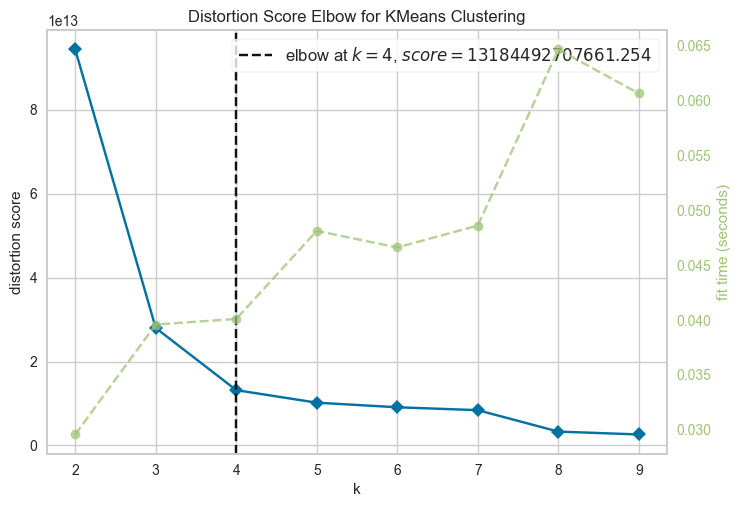

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [142]:
Elbow_M = KElbowVisualizer(model_clustering, k=9)
Elbow_M.fit(data_belum_ditentukan_cluster)
Elbow_M.show()

In [155]:
predict_cluster = KMeans(n_clusters = 3, n_init = 'auto', random_state = 1509)
predict_cluster.fit_predict(data_belum_ditentukan_cluster)

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
predict_cluster.n_iter_

6

In [157]:
data_belum_ditentukan_cluster['Clusters'] = predict_cluster.labels_

C:\Users\farha\AppData\Local\Temp\ipykernel_29372\1224711663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_belum_ditentukan_cluster['Clusters'] = predict_cluster.labels_


In [158]:
lebih_dari_0 = data_belum_ditentukan_cluster['Predicted_Loss'] > 0
data_belum_ditentukan_cluster[lebih_dari_0]

LoanOriginalAmount  Predicted_Loss  Clusters
136                  25000       2500000.0         1
180                  25000       2500000.0         1
188                  25000       2500000.0         1
206                  25000       2500000.0         1
207                  24000       2400000.0         1
...                    ...             ...       ...
109911               25000       2500000.0         1
112310               17500        875000.0         2
112599               19700       1970000.0         1
113662               25000       1250000.0         2
113715               25000        625000.0         0

[488 rows x 3 columns]

In [159]:
data_belum_ditentukan_cluster['Clusters'] = predict_cluster.labels_
lebih_dari_0 = data_belum_ditentukan_cluster['Predicted_Loss'] > 0

C:\Users\farha\AppData\Local\Temp\ipykernel_29372\1960892471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_belum_ditentukan_cluster['Clusters'] = predict_cluster.labels_


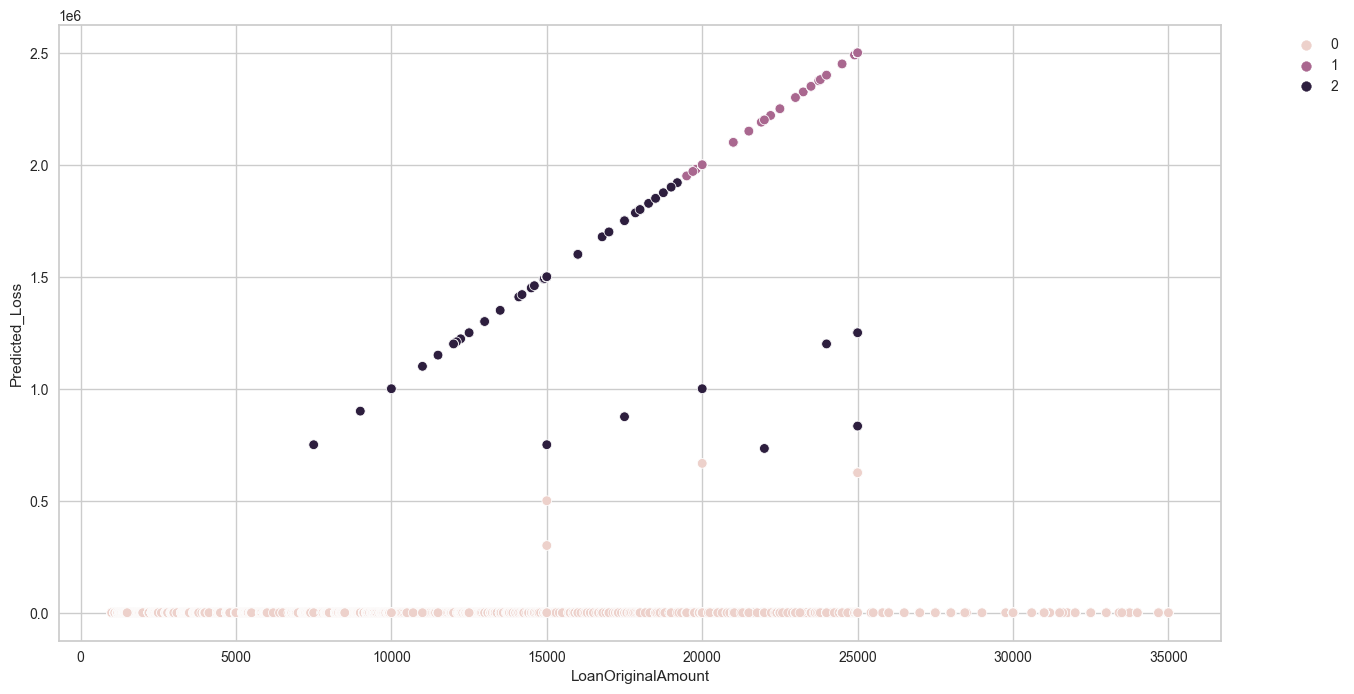

In [160]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=data_belum_ditentukan_cluster.iloc[:, 0], y=data_belum_ditentukan_cluster.iloc[:, 1], hue=data_belum_ditentukan_cluster['Clusters'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# viii. Kesimpulan

Berdasarkan EDA dapat dilihat bahwa:
* Nasabah pada dataset ini banyak yang masih berjalan dalam peminjaman, dan banyak juga yang sudah lunas
* Status pekerjaan Full Time tidak mempengaruhi apakah nasabah akan melunasi pinjaman atau tidak
* Pekerjaan Other dan Professional sama sama memiliki urutan 2 terbesar dalam hal melunasi atau tidaknya pinjaman, pekerjaan other tidak ada penjabaran.

Berdasarkan pemodelan dapat dilihat bahwa:
* Sebanyak 6912 nasabah yang diprediksi layak dapat pinjaman dan aktualnya layak, dan sebanyak 2821 nasabah yang diprediksi tidak layak dapat pinjaman dan aktualnya tidak layak.
* Sebanyak 542 nasabah yang diprediksi layak tetapi aktualnya tidak layak.
* Sebanyak 695 nasabah yang diprediksi tidak layak tetapi aktualnya layak, ini merupakan kondisi yang harus diperhatikan.
* Model ini tergolong overfit karena nilai akurasi pada train dan test yang memiliki gap yang lumayan jauh
* Nasabah dengan cluster 0 merupakan nasabah yang bertanggung jawab, karena seberapa besar nilai hutangnya tetap dibayar lunas, sedangkan pada cluster 1 merupakan nasabah perlu diperhatikan, karena semakin tinggi nilai pinjamannya akan semakin besar uang perusahaan yang hilang, untuk cluster 2 sama saeperti cluster 1, tetapi pada cluster 2 semakin tinggi angka pinjamannnya, maka nilai yang hilang akan semakin lebih besar juga